<div style='text-align: center;'>
    <span style="font-size: 44px; 
                 font-weight: bold;
                 font-family: 'cursive';">LAST PROJECT PENGKOM.</span>
</div>
             
<hr style='height:3px;'>

__Tentang data :__


Sistem berbagi sepeda adalah generasi baru dari persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari posisi tertentu dan kembali lagi ke posisi lain. 

Saat ini, terdapat lebih dari 500 program berbagi sepeda di seluruh dunia yang mencakup lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena peran pentingnya dalam masalah lalu lintas dan lingkungan.

Terlepas dari penerapan sistem bike sharing di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini menjadikannya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem bike sharing menjadi jaringan sensor virtual yang dapat digunakan untuk mendeteksi mobilitas dalam kota
Data ini diambil pada tahun 2011-2012 di Washington DC per hari meliputi data menunjukkan waktu, cuaca sekitar, dan data numerik jumlah penyewa. Data yang digunakan berukuran 56.2 KB (kilobyte) yang mengonsumsi memory cukup kecil. Data _bike sharing_ ini didapatkan pada laman kaggle.com  pada tautan [https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset] yang merupakan pusat komunitas ilmu data. Kaggle adalah platform yang bersumber dari banyak orang untuk menarik, membina, melatih, dan menantang ilmuwan data dari seluruh dunia untuk memecahkan masalah ilmu data, pembelajaran mesin, dan analisis prediktif. Informasi-informasi dari data tersebut diharapkan dapat dijadikan pertimbangan untuk perencanaan wilayah kota dikemudian hari di Indonesia sehingga dapat menyelesaikan masalah kemacetan dan emisi oleh kendaraan bermotor..

# 0. Preparation

In [376]:
# Import Library

import pandas as pd                                  # Library untuk melakukan manipulasi dan operasi data set
from sklearn.linear_model import LinearRegression    # Library untuk melakukan reggression modeling
import matplotlib.pyplot as plt                      # Library untuk melakukan visualisasi data
import numpy as np                                   # Library untuk melakukan manipulasi dan operasi numerikal
import seaborn as sns                                # Library untuk visualisasi data statistik yang dikemas lebih sederhana dan indah
import warnings                                      # Library untuk mengelola warnings pada eksekusi program
warnings.filterwarnings("ignore")                        # segala bentuk warning system akan diabaikan untuk estetika 

In [377]:
# Read Data dengan tipe file csv
    # data bertipe csv (comma separated value) yang artinya data dipisahkan dengan koma
    # sehingga untuk membacanya menggunakan read_csv

df = pd.read_csv("bike_sharing.csv")

In [378]:
# Display Data
#  untuk preview data set yang akan dianalisis

# men-set agar data frame dapat didisplay seluruhnya
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Show Table
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


__Keterangan :__    
1. instant : record index
2. dteday : date (year-month-day)
3. season : season (1:springer, 2:summer, 3:fall, 4:winter)
4. yr : year (0: 2011, 1:2012)
5. mnth : month ( 1 to 12)
6. holiday : weather day is holiday or not
7. weekday : day of the week
8. workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
9. weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
10. temp : Normalized temperature in Celsius. The values are divided to 41 (max)
11. atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
12. hum: Normalized humidity. The values are divided to 100 (max)
13. windspeed: Normalized wind speed. The values are divided to 67 (max)
14. casual: count of casual users
15. registered: count of registered users
16. cnt: count of total rental bikes including both casual and registered

In [379]:
# Membuat prosedur untuk save figure tabel data frame menjadi format png

# Prosedur Save Table
def SaveTab(**kwargs):
    # KAMUS LOKAL : 
    # data, name : str
    # size : tuple
    # fontsize : int

    # mendefinisikan variabel
    data = kwargs['data']
    size = kwargs['size']
    fontsize = kwargs['fontsize']
    name = kwargs['name']

    # membangun bentuk dan bidang koordinat
    fig, ax = plt.subplots(figsize=size)

    # menghilangkan frame bidang koordinat
    ax.axis('off')

    # cleaning dan pendefinisian variabel
    data = data.reset_index() # mengeluarkan index data
    table_data = data.values # variabel untuk menyimpan values data 
    column_names = data.columns.tolist() # variabel untuk menyimpan nama kolom data

    # membangun tabel pada bidang koordinat ax & menghilangkan kolom indeks
    table = ax.table(cellText=table_data, colLabels=column_names, loc='center', bbox=[0, 0, 1, 1.5], rowLabels=['']*data.shape[0])

    # Mengatur font size
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Adjust the font size as needed

    # Menyimpan tabel data frame dalam bentuk png dan menampilkan preview tabel
    plt.savefig(f"{name}.png", bbox_inches="tight")
    plt.show()

# 1. Analytical Description

Pada _analytical description_, dilakukan analisis untuk mendapatkan informasi deskriptif dari data set dan dilakukan cleaning data untuk mempermudah analisis

## 1.1 Data Description

### 1.1.1 Informasi umum data set

In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


__Hasil :__ Secara umum didapatkan bahwa;
- Total baris = 731
- Total kolom = 16
- Range index = 0 to 730
- Disajikan nama kolom pada tabel info Column 
- Disajikan jumlah non-null yang artinya jumlah data tersedia tiap kolom sesuai pada tabel info Non-Null Count
- Disajikan tipe data masing-masing sesuai pada tabel info Dtype dan kuantitas masing-masing tipe data yang tersedia
- Disajikan besar memory yang dipakai = 91.5+ KB

### 1.1.2 Pengecakan data kosong

In [381]:
df.isnull().sum().to_frame().rename(columns={0:'Count'})

,Count
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


__Hasil__ : Tidak ditemukan data kosong

### 1.1.3 Pengecekan data duplikat (data yang sama persis)

In [382]:
df.duplicated().sum()

0

__Hasil :__ Tidak ditemukan data duplikat keseluruhan 

### 1.1.4 Pengecekan data unik dan duplikat per kolom

In [383]:
# loop untuk mengetahui jumlah data duplikat dan unik tiap kolom
for i in range(len(df.columns)):
    duplikat_count = df[df.columns[i]].to_frame().duplicated().sum()
    unik_count = df[df.columns[i]].nunique()
    print(f"{i+1}. \033[1mKOLOM {df.columns[i].upper()}\033[0m \n\tJumlah data duplikat : \033[1m{duplikat_count}\033[0m \n\tJumlah data unik : \033[1m{unik_count}\033[0m\n")

1. KOLOM INSTANT 
	Jumlah data duplikat : 0 
	Jumlah data unik : 731

2. KOLOM DTEDAY 
	Jumlah data duplikat : 0 
	Jumlah data unik : 731

3. KOLOM SEASON 
	Jumlah data duplikat : 727 
	Jumlah data unik : 4

4. KOLOM YR 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

5. KOLOM MNTH 
	Jumlah data duplikat : 719 
	Jumlah data unik : 12

6. KOLOM HOLIDAY 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

7. KOLOM WEEKDAY 
	Jumlah data duplikat : 724 
	Jumlah data unik : 7

8. KOLOM WORKINGDAY 
	Jumlah data duplikat : 729 
	Jumlah data unik : 2

9. KOLOM WEATHERSIT 
	Jumlah data duplikat : 728 
	Jumlah data unik : 3

10. KOLOM TEMP 
	Jumlah data duplikat : 232 
	Jumlah data unik : 499

11. KOLOM ATEMP 
	Jumlah data duplikat : 41 
	Jumlah data unik : 690

12. KOLOM HUM 
	Jumlah data duplikat : 136 
	Jumlah data unik : 595

13. KOLOM WINDSPEED 
	Jumlah data duplikat : 81 
	Jumlah data unik : 650

14. KOLOM CASUAL 
	Jumlah data duplikat : 125 
	Jumlah data unik : 606

15. KOLOM REGISTER

__Keterangan :__
- Jumlah data duplikat berarti banyaknya data yang sama pada kolom tersebut
- Jumlah data unik berarti banyaknya data yang berbeda pada kolom tersebut

### 1.1.5 Pengecekan ukuran data

In [384]:
df.shape

(731, 16)

__Hasil__ : data frame berukuran 731 x 16
 - Jumlah Baris : 731
 - Jumlah Kolom : 16

###  1.1.6 Pengecekan dimensi data

In [385]:
df.ndim

2

__Hasil__ : Dimensi data tersebut adalah 2, yaitu baris dan kolom

### 1.1.7 Pengecekan tipe data awal

In [386]:
df.dtypes.to_frame().rename(columns={0:'Type'})

,Type
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


__Keterangan :__ tipe data awal ini masih belum sesuai dengan yang seharusnya dan akan di-adjust pada bagian selanjutnya    

### 1.1.8 Pengecekan Jumlah Tiap Atribut

#### a) Jumlah Data per Season

In [387]:
df['season'].value_counts().to_frame()

,count
season,
3,188
2,184
1,181
4,178


__Hasil__ :
1. Springer (1) : 181 
2. Summer (2) : 184
3. Fall (3) : 188
4. Winter (4) : 178

#### b) Jumlah Data per Year

In [388]:
df['yr'].value_counts().to_frame()

,count
yr,
1,366
0,365


__Hasil__ :
1. 2011 (0) : 365 
2. 2012 (1) : 366

#### c) Jumlah Data per Month

In [389]:
df['mnth'].value_counts().to_frame()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


__Hasil__ :
1. January : 62
2. February : 57
3. March : 62
4. April : 60
5. May : 62
6. June : 60
7. July : 62
8. August : 62
9. September : 60
10. October : 62
11. November : 60
10. December : 62

#### d) Jumlah Data per Holiday

In [390]:
df['holiday'].value_counts().to_frame()

,count
holiday,
0,710
1,21


__Hasil :__
1. Not Holiday : 710
2. Holiday : 21

#### e) Jumlah Data per Weekday

In [391]:
df['weekday'].value_counts().to_frame()

,count
weekday,
6,105
0,105
1,105
2,104
3,104
4,104
5,104


__Hasil :__

0. Monday : 105
1. Sunday : 105
2. Tuesday : 104
3. Wednesday : 104
4. Thrusday : 104
5. Friday : 104
6. Saturday : 105

#### f) Jumlah Data per Working Day

In [392]:
df['workingday'].value_counts().to_frame()

,count
workingday,
1,500
0,231


__Hasil :__

0. Not a Working Day : 231
1. Working Day : 500

#### g) Jumlah Data per Weather

In [393]:
df['weathersit'].value_counts().to_frame()

,count
weathersit,
1,463
2,247
3,21


__Keterangan dan Konvensi__


1: Clear, Few clouds, Partly cloudy, Partly cloudy = Categorized as __Clear__

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Categorized as __Misty__

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Categorized as __Light Snow and Rain__

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Categorized as __Heavy Rain__

__Hasil :__
1. Clear : 463
2. Misty : 247
3. Light SnowRain : 21
4. Heavy Rain : 0

## 1.2 Data Cleansing

### 1). Menghapus kolom instant karena tidak diperlukan

In [394]:
df.drop('instant', axis=1, inplace=True)

### 2). Mengubah nilai temperatur, feeling temperature, humidity, dan windspeed menjadi nilai aslinya

In [395]:
# Secara default data temperatur, feeling temperature, humidity, dan windspeed telah
    # dibagi dengan nilai terterntu sehingga perlu dilakukan pengubahan nilai agar nilainya sesuai
    # dan dapat dianalisis

## Normalized Temperature : 
df['temp'] = df['temp']*41

## Normalized Feeling Temperature : 
df['atemp'] = df['atemp']*50

## Humidity : 
df['hum'] = df['hum']*100

## Windspeed
df['windspeed'] = df['windspeed']*67

### 3). Mengubah nama kolom agar dapat lebih mudah dibaca dan menyimpan data frame kotor

In [396]:
df.rename(columns={'dteday':'Date',
                   'season':'Season',
                   'yr':'Year',
                   'mnth':'Month',
                   'holiday':'Holiday',
                   'weekday':'Weekday',
                   'workingday':'Workingday',
                   'weathersit':'Weather',
                   'temp':'Temperature',
                   'atemp':'Feeling_Temperature',
                   'hum':'Humidity',
                   'windspeed':'Windspeed', 
                   'casual':'Casual',
                   'registered':'Registered', 
                   'cnt':'Total_Count'},
         inplace=True)

# Menyimpan Data Frame Kotor
    # data kotor perlu disimpan untuk dilakukan operasi statistik karena tipe datanya masih object
df_raw = df.copy()

In [397]:
# Preview Data Frame Kotor
df_raw.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 4). Merubah tipe data yang kurang sesuai

In [398]:
# Tipe data harus disesuaikan dengan agar analisis dapat dilakukan sesuai dengan operasi serta fungsi dalam package pandas

# kolom dteday = date_time
df['Date'] = pd.to_datetime(df['Date'])

# kolom season (index=1) hingga weathersit (index=7)
for i in range(1, 8):
    df[df.columns[i]] = df[df.columns[i]].astype('category')

### 5). Mengubah value data kategorial menjadi string agar lebih mudah diamati

In [399]:
## Season
df['Season'].replace((1,2,3,4), ('Springer', 'Summer', 'Fall', 'Winter'), inplace=True) 

## Year 
df['Year'].replace((0,1), (2011, 2012), inplace=True)

## Month
df['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12), 
                   ('January','February','March','April','May', 'June', 'July', 
                    'August', 'September', 'October',' November', 'December'),
                  inplace=True)
## Holiday
df['Holiday'].replace((0,1), ('No', 'Yes'), inplace=True)

## Weekday 
df['Weekday'].replace((0,1,2,3,4,5,6), 
                      ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'), 
                      inplace=True)

## Working Day
df['Workingday'].replace((0,1), ('No', 'Yes'), inplace=True)

## Weather Situation
df['Weather'].replace((1,2,3,4), 
                         ('Clear','Misty','Light_SnowRain','Heavy_Rain'),
                         inplace=True)

__Keterangan :__
- Urutan data waktu disesuaikan dengan urutan hari pada tahun, misalnya dimulai dari awal bulan Januari hingga Desember di akhir tahun
- Urutan data biner dimulai dari No - Yes
- Urutan data weather disesuaikan menurut dampaknya dimana Heavy_Rain pada urutan ke-4 dapat membawa dampak paling buruk ke sekitar

In [400]:
# Preview Data Frame Bersih
df.head()

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
0,2011-01-01,Springer,2011,January,No,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,No,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,No,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,No,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,No,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Data Analysis

Pada _Data Analysis_ ditampilkan rangkuman statistik dari data set dan visualisasi untuk dilakukan analisis agar dapat menjawab persoalan yang diajukan

## 2.1 Summary Statistics

### 2.1.1 Mendapatkan informasi statistik data

Dengan menggunakan describe() kita mendapatkan informasi statistik seluruh data. Data yang digunakan adalah data kotor (df_raw_desc) yang tipenya masih object agar dapat diolah

In [401]:
## Merubah type Date pada data kotor agar dapat disesuaikan dengan operasi pada pandas
df_raw['Date'] = pd.to_datetime(df['Date'])

## Deskripsi data dan menambah persentil yang akan disajikan
df_raw_desc = df_raw.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

## Merapikan deskripsi data dengan mengganti nama indeks
df_raw_desc.rename(index={'std':'standard deviation',
                      '10%':'percentile 10%',
                      '25%':'percentile 25%',
                      '50%':'percentile 50%',
                      '75%':'percentile 75%',
                      '90%':'percentile 90%'},
               inplace=True)

## Melakukan transpose tabel agar lebih rapi
df_raw_desc = df_raw_desc.transpose()

### 2.1.2 Memilah kategori data 

In [402]:
df_type = df.dtypes.copy()

for i in range(len(df_type)):
    if df_type[df.columns[i]] == 'datetime64[ns]':
        df_type[df.columns[i]] = 'Datetime' 
        
    elif df_type[df.columns[i]] == 'category':
        if len(df[df.columns[i]].value_counts()) < 3:
            df_type[df.columns[i]] = 'Categorical-Biner'    
        else:
            df_type[df.columns[i]] = 'Categorical-Ordinal' 

    elif df_type[df.columns[i]] == 'float64':
        df_type[df.columns[i]] = 'Quantitative-Continues' 
            
    elif df_type[df.columns[i]] == 'int64':
        df_type[df.columns[i]] = 'Quantitative-Discrete' 

df_type = df_type.to_frame().rename(columns={0:'category'})
df_type

,category
Date,Datetime
Season,Categorical-Ordinal
Year,Categorical-Biner
Month,Categorical-Ordinal
Holiday,Categorical-Biner
Weekday,Categorical-Ordinal
Workingday,Categorical-Biner
Weather,Categorical-Ordinal
Temperature,Quantitative-Continues
Feeling_Temperature,Quantitative-Continues


### 2.1.3 Membuat Kolom Interval Data

Dibuat untuk mengetahui batas-batas atribut yang diberikan

In [403]:
# Fungsi Nama Kolom
def ColName(df):
    # KAMUS LOKAL
    # col_name : array of str
    
    col_name = [] 
    for i in range(len(df.columns)):
        col_name.append(df.columns[i])
    return col_name

df_interval = pd.DataFrame(data=['2011/01/01 - 2012/12/31', 
                                 'Springer(1) - Winter(4)',
                                 '2011(0) - 2012(1)',
                                 'January(1) - December(12)',
                                 'No(0) - Yes(1)',
                                 'Sunday(0) - Saturday(6)',
                                 'No(0) - Yes(1)',
                                 'Clear(1) - Heavy_Rain(4)',
                                 '2 - 36',
                                 '3 - 43',
                                 '0 - 100',
                                 '1 - 35',
                                 '2 -  3410',
                                 '20 - 6946',
                                 '22 - 8714',
                                 ],index=ColName(df), columns=['interval'] )
df_interval

,interval
Date,2011/01/01 - 2012/12/31
Season,Springer(1) - Winter(4)
Year,2011(0) - 2012(1)
Month,January(1) - December(12)
Holiday,No(0) - Yes(1)
Weekday,Sunday(0) - Saturday(6)
Workingday,No(0) - Yes(1)
Weather,Clear(1) - Heavy_Rain(4)
Temperature,2 - 36
Feeling_Temperature,3 - 43


### 2.1.4 Membuat Data Frame Jumlah Data Kosong

In [404]:
df_raw_null = df_raw.isnull().sum().to_frame().rename(columns={0:'count NaN'})
df_raw_null

,count NaN
Date,0
Season,0
Year,0
Month,0
Holiday,0
Weekday,0
Workingday,0
Weather,0
Temperature,0
Feeling_Temperature,0


### 2.1.5 Membuat Data Frame Persen Data Kosong

In [405]:
# Fungsi Menghitung Persen Data Kosong
def PersenDataNull(df_raw_null):
    # KAMUS LOKAL
    # perse_data : array of str
    
    persen_data = []
    for i in range(len(df_raw_null)):
        values = f'{df_raw_null.iloc[i,0]}%'
        persen_data.append(values)
    return persen_data
    
df_persen_null = pd.DataFrame(data=PersenDataNull(df_raw_null),
                                   index=ColName(df), 
                                   columns=['persen NaN'] )
df_persen_null

,persen NaN
Date,0%
Season,0%
Year,0%
Month,0%
Holiday,0%
Weekday,0%
Workingday,0%
Weather,0%
Temperature,0%
Feeling_Temperature,0%


### 2.1.6 Menggabungkan Data Frame agar lebih mudah diamati

In [406]:
df_statistics = pd.concat([df_raw_desc, df_interval , df_type, df_raw_null, df_persen_null], axis=1)
df_statistics

,count,mean,min,percentile 10%,percentile 25%,percentile 50%,percentile 75%,percentile 90%,max,standard deviation,interval,category,count NaN,persen NaN
Date,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-03-15 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-10-19 00:00:00,2012-12-31 00:00:00,NaN,2011/01/01 - 2012/12/31,Datetime,0,0%
Season,731.0,2.49658,1.0,1.0,2.0,3.0,3.0,4.0,4.0,1.110807,Springer(1) - Winter(4),Categorical-Ordinal,0,0%
Year,731.0,0.500684,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.500342,2011(0) - 2012(1),Categorical-Biner,0,0%
Month,731.0,6.519836,1.0,2.0,4.0,7.0,10.0,11.0,12.0,3.451913,January(1) - December(12),Categorical-Ordinal,0,0%
Holiday,731.0,0.028728,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.167155,No(0) - Yes(1),Categorical-Biner,0,0%
Weekday,731.0,2.997264,0.0,0.0,1.0,3.0,5.0,6.0,6.0,2.004787,Sunday(0) - Saturday(6),Categorical-Ordinal,0,0%
Workingday,731.0,0.683995,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.465233,No(0) - Yes(1),Categorical-Biner,0,0%
Weather,731.0,1.395349,1.0,1.0,1.0,1.0,2.0,2.0,3.0,0.544894,Clear(1) - Heavy_Rain(4),Categorical-Ordinal,0,0%
Temperature,731.0,20.310776,2.424346,10.66,13.820424,20.431653,26.872076,29.998347,35.328347,7.505091,2 - 36,Quantitative-Continues,0,0%
Feeling_Temperature,731.0,23.717699,3.95348,12.7523,16.892125,24.33665,30.4301,33.9019,42.0448,8.148059,3 - 43,Quantitative-Continues,0,0%


Berdasarkan data frame statistik didapatkan masing-masing statistik atribut : 

1. Count menentukan banyak data masing-masing atribut yang tersedia. Didapatkan seluruhnya bernilai 731 yang sesuai dengan banyak baris data sehingga dapat disimpulkan bahwa setiap atribut tidak terdapat data yang kosong
2. Mean menunjukkan jumlah total nilai data yang dibagi dengan banyak data dari masing-masing atribut. Nilai rerata dapat berfungsi sebagai representasi pusat persebaran data tersebut. Beberapa catatan untuk data kategorikal : 
   - beberapa atribut kategorial tidak relevan dengan perhitungan rerata seperti 'Date', 'Month', 'Season', 'Year', dan 'Weekday' karena nilai datanya tetap untuk setiap tahun
   - nilai rerata untuk holiday (kategorikal biner) bernilai 0.028 yang berarti lebih banyak hari yang bukan liburan (not holiday (0)) karena nilainya mendekati 0. Sedangkan atribut 'Workingday' berlawanan dengan atribut 'Holiday' dimana nilainya 0.68 yang berarti lebih banyak hari kerja karena nilainya mendekati 1 
    - nilai rerata untuk weather (kategorikal ordinal (1-4)) bernilai 1.39 yang berarti lebih banyak musim dengan kategori 1 yaitu clear
3. Persentil akan membagi data menjadi 100 bagian yang berfungsi untuk menentukan posisi data terhadap persebarannya. Persentil yang digunakan dalam statistik ini adalah 0.1, 0.25, 0.5 (median), 0.75, 0.9. Persentil 0.5 atau median dapat dijadikan sebagai metode lain untuk menentukan pusat persebaran data.
   - berdasarkan data statistik didapatkan sebagian besar nilai mediannya mirip dengan nilai reratanya kecuali pada atribut 'Casual' yang dimana mean > mediannya. Hal ini dapat menunjukkan bahwa persebarannya lebih berada di arah kiri data dan dimungkinkan terdapat outliner yang berada di kanan median.
4. Nilai maksimum dan minimum berfungsi untuk menentukan batas atas dan batas bawah atribut
5. Standard Deviation berfungsi untuk mengukur nilai data terhadap rata-ratanya. Hal ini bertujuan untuk menentukan variasibilitas data dimana semakin besar nilai SD maka semakin bervariasi datanya dan juga semakin menyebar.
   - berdasarkan data statistik didapatkan standard deviasi bernilai tinggi pada data banyak penyewa 'Casual', 'Registered', dan 'Total_Value' yang berarti data-data tersebut nilainya bervariasi dari batas bawahnya hingga batas atasnya. Namun diketahui pula berdasar poin 3 bahwa nilai persebarannya normal kecuali pada atribut 'Casual' walaupun variasinya tinggi
7. Interval berfungsi untuk menggambarkan batas-batas nilai atribut
8. Category berfungsi untuk menunjukkan kategori data yang dapat membantu analisis data
9. Count NaN dan Persen NaN menunjukkan jumlah data kosong.
    - berdasarkan  data statistik didapatkan bahwa tidak ada data kosong yang artinya data tersebut siap untuk dianalisis dan dilakukan visualisasi.

## 2.2 Analysis and Visualization

### 2.2.1. Diagram Data

#### a) Jumlah Data Tersedia

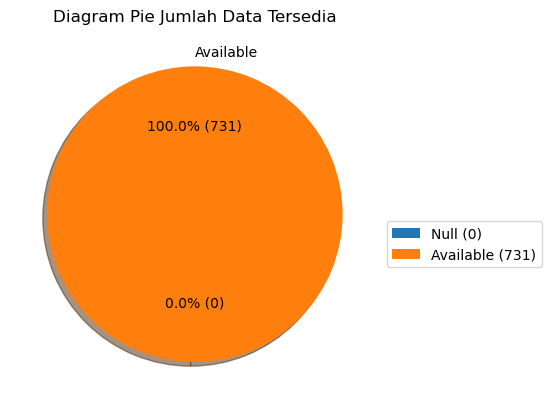

In [407]:
# Menghitung jumlah data kosong total dan yang tersedia 
count_null = df.isnull().sum().sum()
count_nonull = len(df)-count_null

# Membuat data frame
df_null = pd.DataFrame({'Count':[count_null, count_nonull]}, index=['Null','Available'])

# Plotting pie chart
ax = df_null['Count'].plot(kind='pie', 
                           autopct=lambda p: f"{p:.1f}% ({p*len(df)/100:.0f})", 
                           ylabel='', 
                           title='Diagram Pie Jumlah Data Tersedia', 
                           startangle=270,
                           shadow=True)

# Add custom legend
legend_labels = [f'{label} ({count})' for label, count in zip(df_null.index, df_null['Count'])]
ax.legend(legend_labels, loc='upper left', bbox_to_anchor=(1, 0.5))

# Menampilkan diagram
plt.show()

Berdasarkan diagram pie tersebut didapatkan bahwa tidak ada data kosong dan seluruh data tersedia sehingga dapat dilakukan analisis 

#### b) Perbandingan Data Unik dan Duplikat

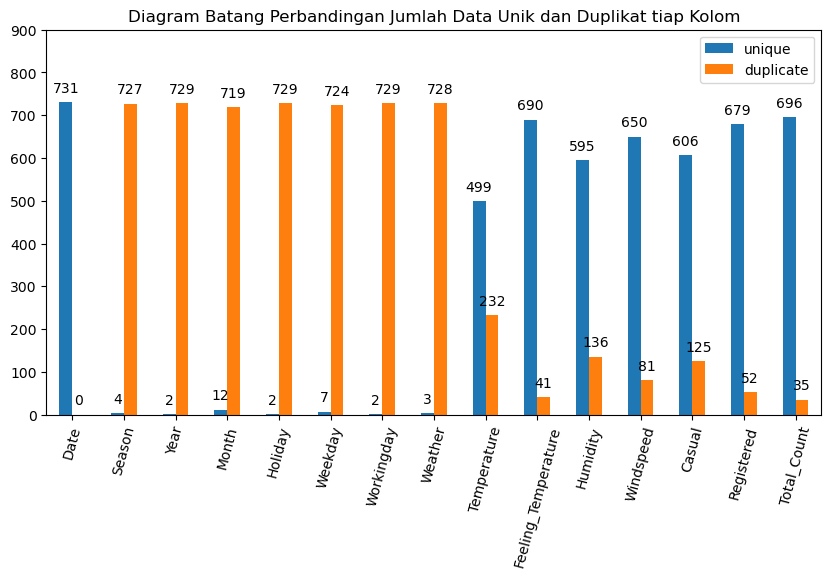

In [408]:
# Membuat data frame

## data frame data duplikat
duplikat = []
for i in range(len(df.columns)):
    duplikat_value = df[df.columns[i]].duplicated().sum()
    duplikat.append(duplikat_value)
df_duplikat = pd.DataFrame(duplikat, index=ColName(df), columns=['duplicate'])

## data frame data unique
df_unique = df.nunique().to_frame().rename(columns={0:'unique'})

## menggabungkan data frame
df_ud = pd.concat([df_unique, df_duplikat], axis=1)

# Membuat visualisasi dengan bar chart
ax = df_ud.plot(kind='bar', 
          y=['unique','duplicate'],
          rot=75, 
          figsize=(10,5), 
          ylim=(0,900),
          title='Diagram Batang Perbandingan Jumlah Data Unik dan Duplikat tiap Kolom')

# Membuat anotasi untuk menunjukkan value dari diagram bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menampilkan diagram
plt.show()

Berdasarkan diagram batang tersebut didapatkan bahwa atribut kategorikal memiliki jumlah data duplikasi yang banyak hal ini dikarenakan data kategorikal memuat beberapa penggolongan sebanyak data unik mereka, misalnya atribut 'Month' memiliki 12 data unik yang merupakan nama bulan dari Januari hingga Desember. Sedangkan atribut numerikal dan time-series memiliki jumlah data duplikasi yang sedikit dan data unik yang banyak hal ini dikarenakan data numerikal memuat data random tiap harinya dan tidak terdapat pada penggolongan tertentu. Duplikasi pada data numerikal disebabkan akibat nilai yang sama pada waktu yang berbeda. Perhatikan pada atribut 'Date' tidak terdapat duplikasi karena merupakan time-series maju yang setiap harinya berbeda.

#### c) Kategori Data

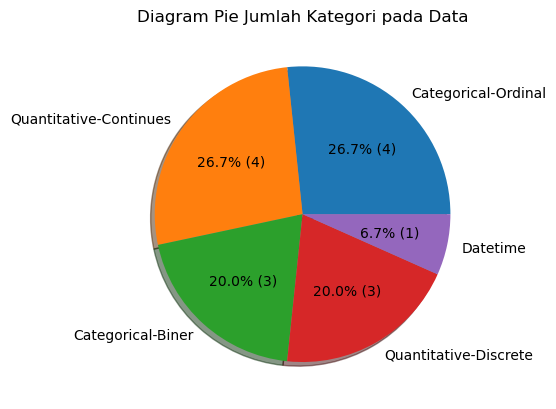

In [409]:
# Menghitung jumlah data berdasar kategorinya
# Melakukan visualisasi dengan diagram pie untuk menunjukkan jumlah kategori yang tersedia pada data set
df_statistics['category'].value_counts().plot(kind='pie', 
                                              title='Diagram Pie Jumlah Kategori pada Data',
                                              autopct=lambda p: f'{p:.1f}% ({len(df_statistics) * p / 100:.0f})', 
                                              ylabel='', 
                                              shadow=True)

# Menampilkan data
plt.show()

Berdasarkan diagram pie tersebut : 
1. Atribut Kategorikal Ordinal berjumlah = 4 : Season, month, weekday, dan weather
   - Atribut-atribut tersebut digolongkan menjadi kategorikal ordinal karena atribut tersebut memuat nilai kategori dengan urutan tertentu, misalnya season yang dimulai dari springer hingga winter sesuai dengan tanggal. 
3. Atribut Kategorikal Biner berjumlah = 3 : Year, Holiday, dan Workingday
   - Atribut-atribut tersebut digolongkan menjadi kategorikal biner karena atribut tersebut memuat 2 nilai, misalnya tahun 2011 dan 2012, holiday dan not holiday, serta workingday dan not workingday
5. Atribut Kuantitatif Kontinu berjumlah = 4 : Temperature, Feeling_Temperature, Humidity, dan Windspeed
   - Atribut-atribut tersebut digolongkan menjadi kuantiatif kontinu karena atribut tersebut memuat data numerikal yang nilainya diambil di rentang kontinu, misalnya temperatur yang terdefinisi di rentang kontinu 30°C - 35.5°C (contoh)
7. Atribut Kuantitatif Diskrit berjumlah = 3 : Casual, Registered, dan Total_Count
   - Atribut-atribut tersebut digolongkan menjadi kuantiatif diskrit karena atribut tersebut memuat data numerikal yang nilainya tidak dapat diambil di rentang kontinu, misalnya banyaknya penyewa casual yang tidak kontinu atau nilainya hanya akan berada pada bilangan bulat (tidak ada jumlah penyewa casual sebanyak 100.2)
9. Atribut Time-Series berjumlah = 1 : Date
    - Atribut tersebut digolongkan menjadi Time-Series karena atribut tersebut memuat data waktu yang berkelanjutan maju, seperti tanggan 2011-01-01 < 2011-01-02 < 2011-01-03 < ...

### 2.2.2 Distribusi Data

#### a) Distribusi Total Penyewaan

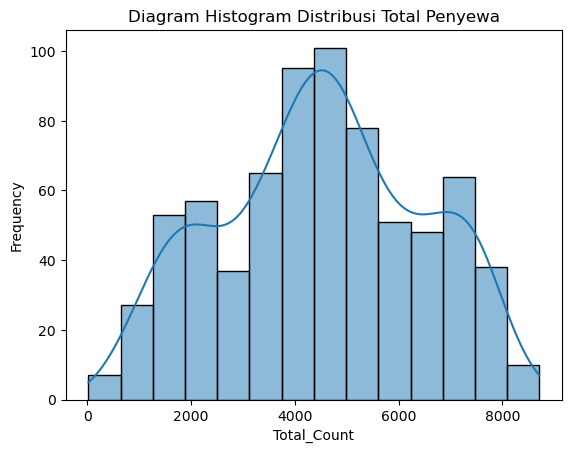

In [410]:
# Melakukan visualisasi histogram dengan library seaborn agar dapat mengetahui grafik Kernel Density Estimation (KDE)
ax = sns.histplot(data=df['Total_Count'],edgecolor='black', kde=True)

# Mengatur label
ax.set(xlabel='Total_Count', ylabel='Frequency', title='Diagram Histogram Distribusi Total Penyewa')

# Menampilkan visualisasi
plt.show()

Berdasarkan pola distribusi data jumlah orang yang menyewa sepeda secara Casual dan Registered didapatkan bahwa :
- jumlah para penyewa harian paling sering berada di interval 4000-6000 orang dalam satu hari dengan frekuensi hingga 100 kali
  
Conclusion : 
- Perlu dipersiapkan banyak sepeda seminimalnya sebanyak 4000-6000 buah

#### b) Distribusi Penyewa Casual dan Registered 

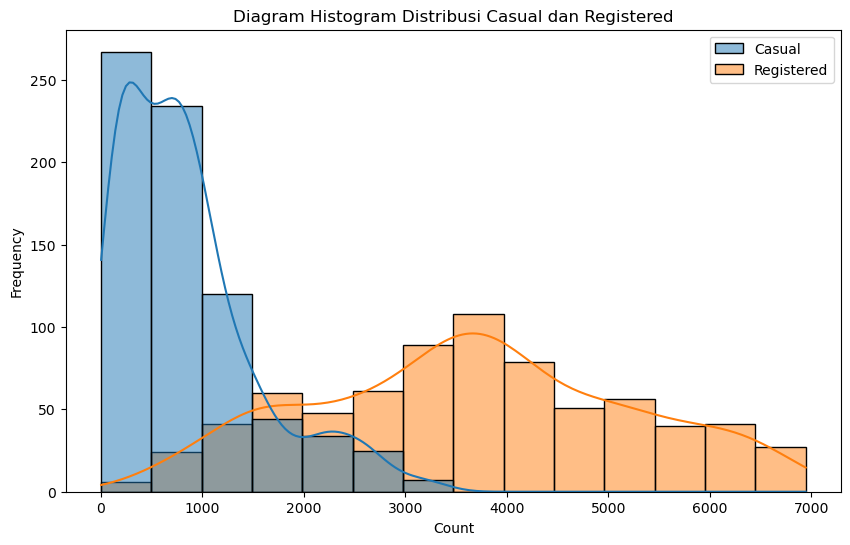

In [411]:
# Mengatur ukuran bentuk 
plt.figure(figsize=(10,6))

# Melakukan visualisasi histogram dengan seaborn
ax = sns.histplot(data=df[['Casual', 'Registered']],color='skyblue',edgecolor='black', kde=True)

# Mengatur label
ax.set(xlabel='Count', ylabel='Frequency', title='Diagram Histogram Distribusi Casual dan Registered')

# Menampilkan visualisasi
plt.show()

Berdasarkan pola distribusi data jumlah orang yang menyewa sepeda secara _Casual_ dan _Registered_ didapatkan bahwa :
1. jumlah para penyewa tanpa berlangganan (Casyal) cenderung berada di interval 0-1000 orang dalam satu hari dengan frekuensi hingga lebih dari 250. Data terdistribusi di daerah kiri.
2. jumlah para penyewa berlangganan (Registered) cenderung berada di interval 3000-4000 orang dalam satu hari dengan frekuensi hingga kurang lebih 100. Data terdistribusi normal

Conclusion : 
Kita dapat membagi persiapan sepeda menjadi dua jenis, yaitu untuk pelanggan casual dan registered. Pembagian ini dapat digunakan untuk memangkas biaya yang dikeluarkan atau membagi jenis sepeda.
- Perlu dipersiapkan banyak sepeda untuk penyewa casual seminimalnya sebanyak 0-1000 buah
- Perlu dipersiapkan banyak sepeda untuk penyewa registered seminimalnya sebanyak 3000-4000 buah


#### c) Distribusi Temperature dan Feeling Temperature

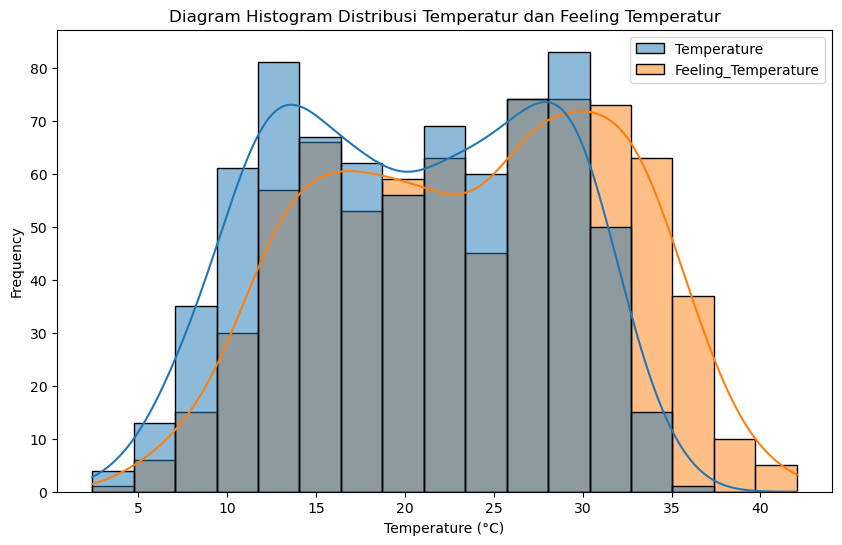

In [412]:
# Mengatur ukuran bentuk 
plt.figure(figsize=(10,6))

# Melakukan visualisasi histogram dengan seaborn
ax = sns.histplot(data=df[['Temperature','Feeling_Temperature']],edgecolor='black', kde=True)

# Mengatur label
ax.set(xlabel='Temperature (°C)', ylabel='Frequency',  title='Diagram Histogram Distribusi Temperatur dan Feeling Temperatur')

# Menampilkan visualisasi
plt.show()

Berdasarkan pola distribusi data temperatur dan feeling temperature didapatkan bahwa :
1. jumlah temperatur harian paling sering berkisar pada 10-15 &deg;C dan 25-30 &deg;C
2. jumlah feeling temperature harian paling sering berkisar pada 15 &deg;C dan 25-30 &deg;C

Conclusion : 
- Nilai temperatur dan feeling temperatur mirip dikarenakan feeling temperature merupakan temperatur yang dirasakan pengguna yang bisa saja berbeda dengan nilai aslinya
- Persebarannya banyak berada di rentang 10-15 &deg;C yang menunjukkan musim dingin dan 25-30 &deg;C yang menunjukkan musim panas  

#### d) Distribusi Kelembapan

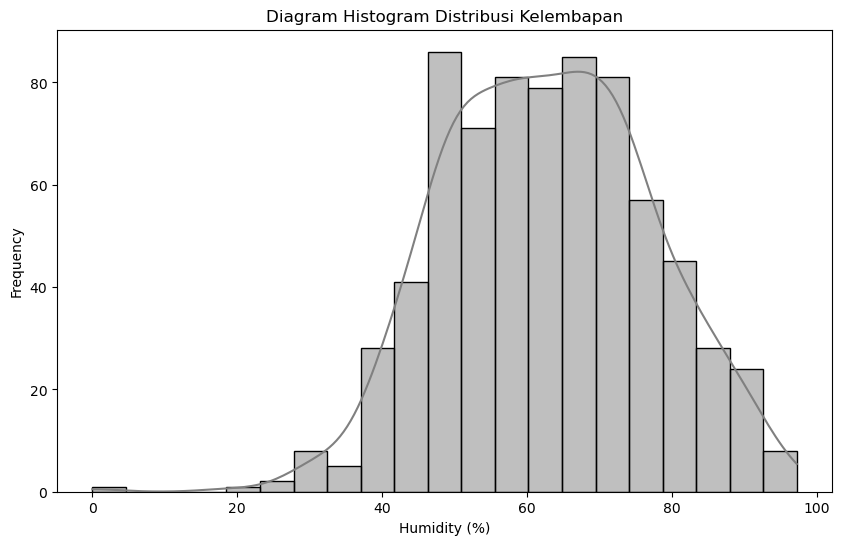

In [413]:
# Mengatur ukuran bentuk 
plt.figure(figsize=(10,6))

# Melakukan visualisasi histogram dengan seaborn
ax = sns.histplot(data=df['Humidity'], color='gray',edgecolor='black', kde=True)

# Mengatur label
ax.set(xlabel='Humidity (%)', ylabel='Frequency',  title='Diagram Histogram Distribusi Kelembapan')

# Menampilkan visualisasi
plt.show()

Berdasarkan pola distribusi data kelembapan didapatkan bahwa :
1. jumlah kelembapan harian paling sering berkisar pada 50 - 80% dengan frekuensi hingga lebih dari 80

Conclusion : 
- Nilai persebaran kelembapan berada di rentang yang besar, yaitu 50-80% yang dimana rentang kelembapan ini adalah kelembapan normal yang nyaman sehingga sebagian besar kelembapan di Washington DC termasuk nyaman untuk bersepeda

#### e) Distribusi Kecepatan Angin

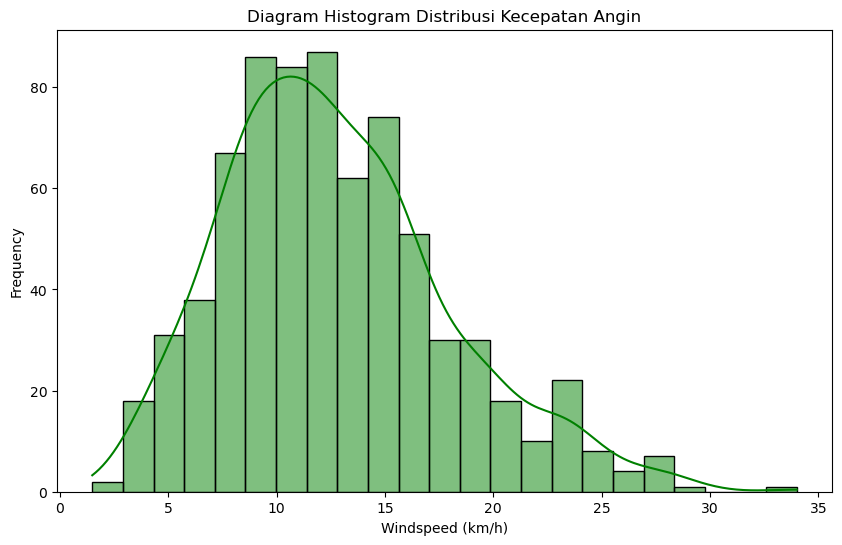

In [414]:
# Mengatur ukuran bentuk 
plt.figure(figsize=(10,6))

# Melakukan visualisasi histogram dengan seaborn
ax = sns.histplot(data=df['Windspeed'], color='green',edgecolor='black', kde=True)

# Mengatur label
ax.set(xlabel='Windspeed (km/h)', ylabel='Frequency',  title='Diagram Histogram Distribusi Kecepatan Angin')

# Menampilkan visualisasi
plt.show()

Berdasarkan pola distribusi data kecepatan angin didapatkan bahwa :
1. jumlah kelembapan harian paling sering berkisar pada 10 km/h dengan frekuensi hingga lebih dari 80

Conclusion : 
- Kecepatan angin di Washington DC atau di tempat pendataan cenderung normal, yaitu berada sekitar 10 km/h yang merupakan kecepatan angin yang nyaman untuk manusia

### 2.2.3 Hubungan Data Terhadap Waktu

#### a) Data Penyewa

o Visualisasi persebaran selama 2 tahun

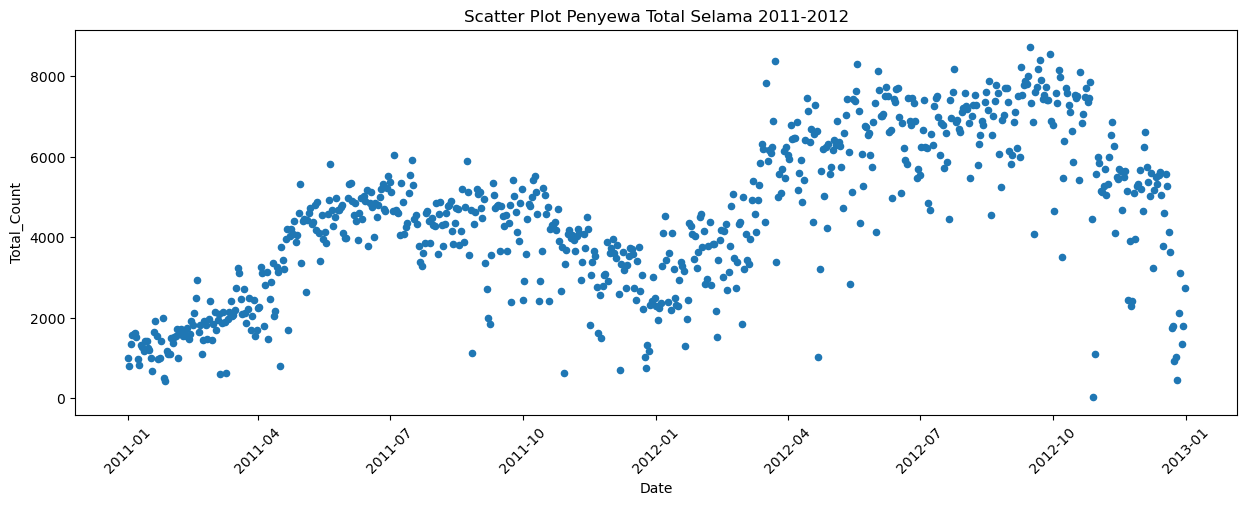

In [415]:
# Melakukan visualisasi data dengan scatter plot untuk melihat persebaran total penyewa dalam 2 tahun
df.plot(kind='scatter', 
        x='Date', 
        y='Total_Count', 
        rot=45, 
        title=('Scatter Plot Penyewa Total Selama 2011-2012'), 
        figsize=(15,5))

# Menampilkan visualisasi
plt.show()

Berdasarkan grafik scatter plot total penyewa selama 2011-2012, didapatkan hasil bahwa jumlah penyewa akan naik apabila mendekati bulan ke-7 dan kembali menurun hingga akhir taun di bulan ke-12

In [416]:
# Membuat fungsi untuk regresi linear

# Fungsi Linear Reggression
def LinRegression(x_cpy,y):
    # Mengambil fungsi regresi linear dari sklearn
    lr = LinearRegression()

    # Mencocokkan dengan sumbu-x dan -y
    lr.fit(x_cpy,y)

    # Mendapatkan garis linear regresi
    y_pred = pd.Series(lr.predict(x_cpy))
    return y_pred

# Fungsi Reggression Graph untuk sumbu-x dalamm hari
def RegGraph(**kwargs):
    # Menyalin data frame bersih
    df_reg = df.copy()

    # Mendefinisikan variael
    years = kwargs['years']
    subject = kwargs['subject']

    # Jika memilih seluruh tahun
    if years == 'all':
        x = df_reg.index.values
        y = df_reg.loc[:, subject]

    # Jika memilih tahun tertentu
    else:
        x = df_reg[df['Year'] == int(years)].reset_index().index.values
        y = df_reg.loc[df['Year'] == int(years), subject]

    x_cpy = pd.Series(x)
    x_cpy = np.array(x).reshape(-1,1)

    y_pred = LinRegression(x_cpy,y)

    return x, y, y_pred 

# Fungsi Annotation Day
def AnnotationDay(**kwargs):
    # Mendefinisikan variabel
    years = kwargs['years']
    subject = kwargs['subject']

    # Jika memilih seluruh tahun
    if years == 'all':
        max_index = df[subject].idxmax()
        max_value = df[subject].max()

        min_index = df[subject].idxmin()
        min_value = df[subject].min()

    # Jika memilih tahun tertentu
    else:
        max_index = df.loc[df['Year'] == int(years)][subject].idxmax()
        max_value = df.loc[df['Year'] == int(years)][subject].max()
        
        min_index = df.loc[df['Year'] == int(years)][subject].idxmin()
        min_value = df.loc[df['Year'] == int(years)][subject].min()
        
    return max_value, max_index, min_value, min_index

o Visualisasi persebaran data untuk sampel 2011 dan keseluruhan per hari 

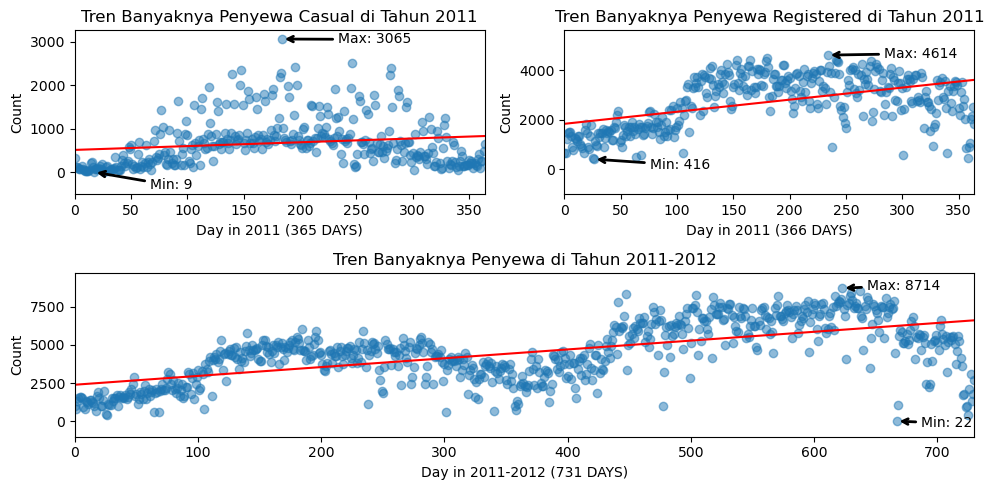

In [417]:
### DISCLAIMER :  Dipilih sampel data tahun 2011 karena ingin mengetahui perkembangan data pada setahun awal pendataan

# Mengambil nilai dari fungsi regresi
x1, y1, y_pred1= RegGraph(years='2011', subject='Casual')
x2, y2, y_pred2= RegGraph(years='2011', subject='Registered')
x3, y3, y_pred3= RegGraph(years='all', subject='Total_Count')

# Menginisiasi bentuk dan bidang koordinat
    # bentuk dibuat dengan 2 baris dan 2 kolom (berbentuk seperti grid)
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,5))

    # karena menginginkan 2 kolom di baris 1 dan 1 kolom di baris 2, maka kolom di baris 2 harus di-merge
# Mengambil gridspec
gs = ax[1, 0].get_gridspec()

# Menghapus grid untuk baris 2 kolom 1 hingga 2
for axes in ax[1,:]:
    axes.remove()

# Menambah subplot untuk baris 2 kolom 1 hingga 2
ax_all = fig.add_subplot(gs[1,:])

### Grafik untuk data penyewa casual di tahun 2011
## pengaturan grafik
ax[0,0].set_xlim(0, x1.max())
ax[0,0].set_ylim(-500, y1.max()+200)
ax[0,0].set_xlabel('Day in 2011 (365 DAYS)')
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Tren Banyaknya Penyewa Casual di Tahun 2011')

## melakukan visualisasi dengan scatter plot untuk valuenya dan line graph untuk regresi linear
ax[0,0].scatter(x = x1, y = y1, alpha=0.5)
ax[0,0].plot(y_pred1, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='2011', subject='Casual')

ax[0,0].annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+50, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax[0,0].annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+50, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Grafik untuk data penyewa registered di tahun 2011
## pengaturan grafik
ax[0,1].set_xlim(0, x2.max())
ax[0,1].set_ylim(-1000, y2.max()+1000)
ax[0,1].set_xlabel('Day in 2011 (366 DAYS)')
ax[0,1].set_ylabel('Count')
ax[0,1].set_title('Tren Banyaknya Penyewa Registered di Tahun 2011')

## melakukan visualisasi dengan scatter plot untuk valuenya dan line graph untuk regresi linear
ax[0,1].scatter(x = x2, y = y2, alpha=0.5)
ax[0,1].plot(y_pred2, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='2011', subject='Registered')

ax[0,1].annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+50, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax[0,1].annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+50, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Grafik untuk data seluruh hari terhadap total penyewa per hari
## pengaturan grafik
ax_all.set_xlim(0, x3.max())
ax_all.set_ylim(-1000, y3.max()+1000)
ax_all.set_xlabel('Day in 2011-2012 (731 DAYS)')
ax_all.set_ylabel('Count')
ax_all.set_title('Tren Banyaknya Penyewa di Tahun 2011-2012')

## melakukan visualisasi dengan scatter plot untuk valuenya dan line graph untuk regresi linear
ax_all.scatter(x = x3, y = y3, alpha=0.5)
ax_all.plot(y_pred3, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='all', subject='Total_Count')
ax_all.annotate(f'Max: {max_value}', xy=(max_index, max_value),
                xytext=(max_index+20, max_value-100),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax_all.annotate(f'Min: {min_value}', xy=(min_index, min_value),
                xytext=(min_index+20, min_value-400),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Mengatur layout agar simetri
fig.tight_layout()

### Menampilkan visualisasi
plt.show()

Tren penyewa casual tahun 2011 :
- Berdasarkan grafik kiri-atas, diketahui bahwa tren banyaknya penyewa casual di tahun 2011 cenderung naik hingga ke akhir tahun namun kenaikannya tidak signifikan terlihat dari kemiringan garis regresi yang lebih mendatar (mendekati 0) dan pola persebarannya juga cenderung fluktuatif.

Tren penyewa registered tahun 2011 :   
- Berdasarkan grafik kanan-atas, diketahui bahwa tren banyaknya penyewa registered di tahun 2011 cenderung naik hingga ke akhir tahun terlihat dari kemiringan garis regresi yang cukup tinggi dan pola persebarannya juga lebih stabil.
- Jumlah penyewa registered minimum dan maksimum lebih dari penyewa casual, terlihat bahwa nilai maksimum penyewa registered  mencapai 4614 (+1549 dari casual) dan nilai minimumnya mencapai 416 (+407 dari casual). Sehingga dapat disimpulkan penyewa dengan member lebih diminati oleh masyarakat.

Tren penyewa total selama tahun 2011-2012 : 
- Berdasarkan grafik bawah, diketahui bahwa tren banyaknya penyewa total selama tahun 2011-2012 cenderung naik hingga ke akhir pendataan terlihat dari kemiringan garis regresi yang positif meninggi. Hal ini membuktikan bahwa sistem bike-sharing ini semakin diminati masyarakat.

o Visualisasi banyaknya data penyewa tiap bulan untuk sampel tahun 2011

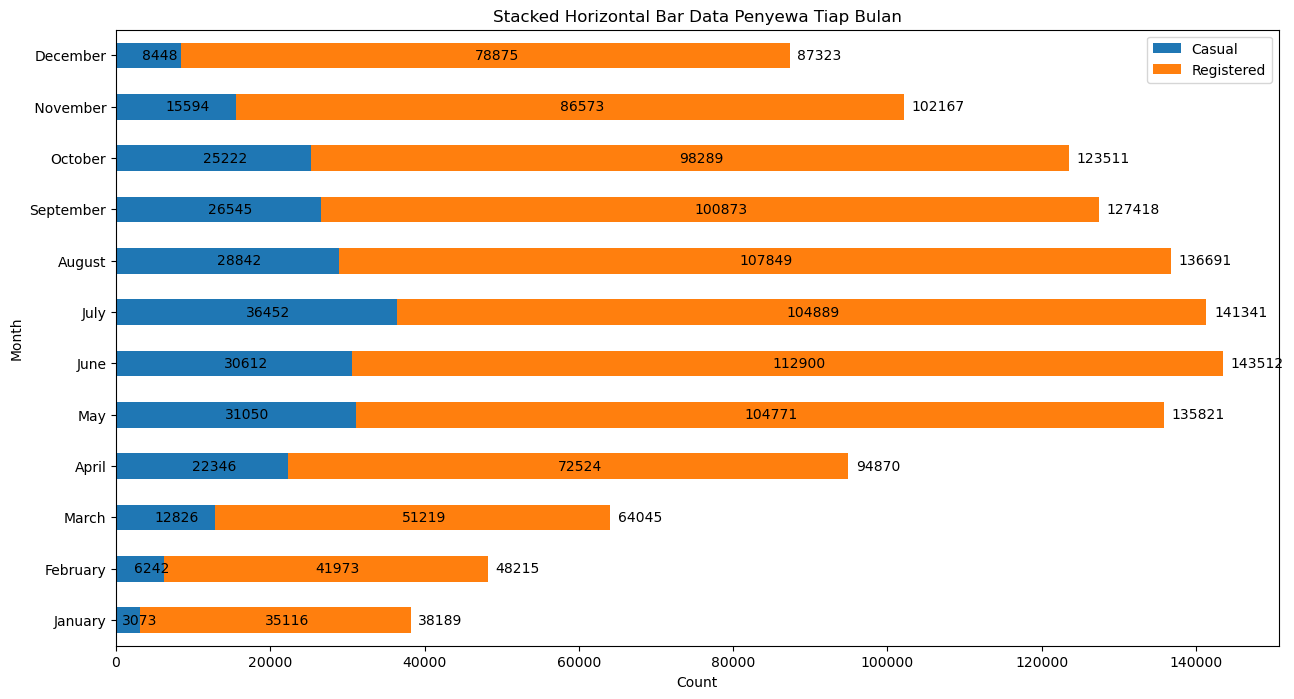

In [418]:
### DISCLAIMER :  Dipilih sampel data tahun 2011 karena ingin mengetahui perkembangan data pada setahun awal pendataan

# Melakukan pengelompokkan berdasarkan bulan dengan menambahkan seluruh value atribut pada bulan tersebut
    # diambil dengan menggunakan df_raw yang tipenya masih float / int sehingga dapat dilakukan operasi pengelompokan keseluruhan
    # data time series (indeks column =0) tidak diikutsertakan sehingga pengelompokkan dimulai dari indeks column = 1 hingga seterusnya
    # nama bulan pada df_raw berupa angka sehingga diperlukan pengubahan untuk menjadi str sehingga lebih mudah diamati\

df_total_month = df_raw.iloc[:,1:].loc[df['Year'] == 2011].groupby(['Month']).sum()
df_total_month.index = df['Month'].unique() 

### Membangun bidang koordinat dan melakukan visualisasi dengan horizontal bar yang di-stack
ax = df_total_month[['Casual', 'Registered']].plot(kind='barh', stacked=True, figsize=(15,8))

### Pengaturan grafik
ax.set_title('Stacked Horizontal Bar Data Penyewa Tiap Bulan')
ax.set_xlabel('Count')
ax.set_ylabel('Month')

### Anotasi
    # Untuk jumlah casual dan registered
        # diambil informasi bentuk rectangle untuk menyatakan diagram batang masing-masing atribut
        # dilakukan anotasi sesuai informasi tersebut dan dirapikan 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()

    ax.annotate(f'{width:.0f}', (x + width / 2 + 1500, y + height / 2), ha='center', va='center', color='black', fontsize=10)

    # Untuk jumlah total (casual + registered)
        # mengambil indeks dan urutan sesuai df_total_month
        # kemudian dicari nilai Total_Count
for i, month in enumerate(df_total_month.index):
    total_value = df_total_month.loc[month, 'Total_Count']
    ax.annotate(f'{total_value:.0f}', (total_value+1000, i), ha='left', va='center', color='black', fontsize=10)
    
### Show the Graph
plt.show()

Berdasarkan stacked horizontal bar chart tersebut : 
- Nilai jumlah penyewa casual berbanding lurus dengan jumlah penyewa registered. Terlihat dengan semakin besar nilai casual maka semakin besar pula registered, begitu juga ketika nilai casual semakin turun (ketika mulai bulan Agustus).
- Nilai casual dan registered akan mulai naik ketika menuju bulan july dan menurun ketika menuju bulan desember dengan nilai tertinggi pada bulan july. Hal ini dikarenakan pada bulan july merupakan musim panas yang umumnya dijadikan sebagai bulan liburan dan rekreasi di US sehingga banyak penyewa sepeda yang bertujuan untuk sarana rekreasi.

o Visualisasi banyaknya penyewa tiap minggu

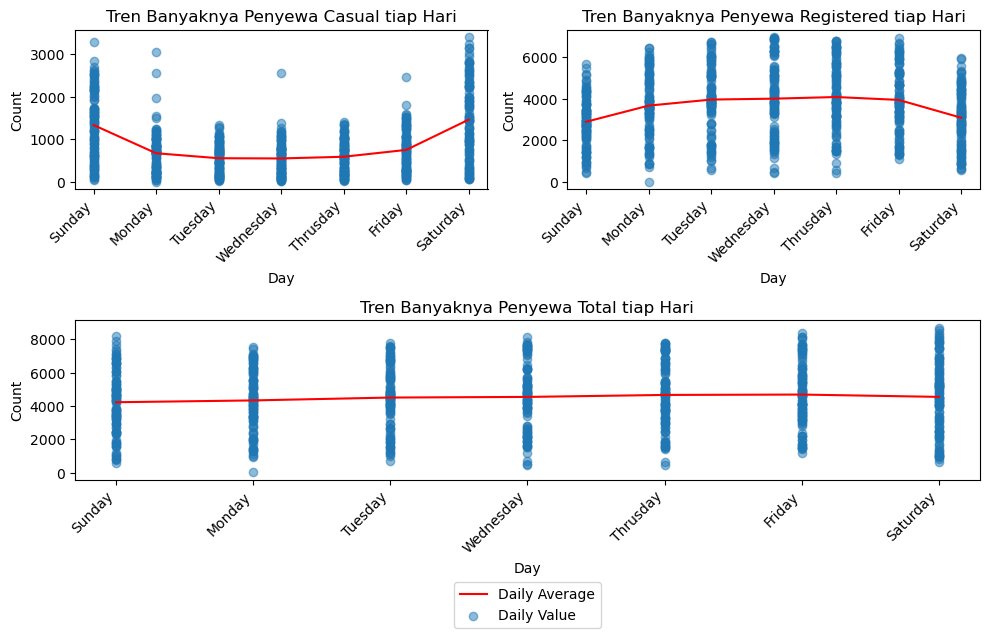

In [419]:
### Membuat data frame pengelompokan berdasarkan hari dalam seminggu dengan rata-rata value
df_weekday_casual = df.groupby(['Weekday'])['Casual'].mean()
df_weekday_registered = df.groupby(['Weekday'])['Registered'].mean()
df_weekday_total = df.groupby(['Weekday'])['Total_Count'].mean()

### Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,7))

### Mengatur dan menyiapkan grid
gs = ax[1, 0].get_gridspec()
for axes in ax[1,:]:
    axes.remove()

ax_all = fig.add_subplot(gs[1,:])

### Grafik untuk penyebaran data casual tiap hari
## Melakukan visualisasi
ax[0,0].plot(df_weekday_casual, color='r')
ax[0,0].scatter(x = df['Weekday'], y=df['Casual'], alpha=0.5)

## pengaturan grafik
ax[0,0].set_title('Tren Banyaknya Penyewa Casual tiap Hari')
ax[0,0].set_xlabel('Day')
ax[0,0].set_ylabel('Count')
ax[0,0].set_xticklabels(df_weekday_casual.index,rotation=45, ha='right')

### Grafik untuk penyebaran data registered tiap hari
## Melakukan visualisasi
ax[0,1].plot(df_weekday_registered, color='r')
ax[0,1].scatter(x = df['Weekday'], y=df['Registered'], alpha=0.5)

## pengaturan grafik
ax[0,1].set_title('Tren Banyaknya Penyewa Registered tiap Hari')
ax[0,1].set_xlabel('Day')
ax[0,1].set_ylabel('Count')
ax[0,1].set_xticklabels(df_weekday_registered.index,rotation=45, ha='right')

### Grafik untuk penyebaran data total tiap hari
## Melakukan visualisasi
ax_all.plot(df_weekday_total, color='r', label='Daily Average')
ax_all.scatter(x = df['Weekday'], y=df['Total_Count'], alpha=0.5,label='Daily Value')

## pengaturan grafik
ax_all.set_title('Tren Banyaknya Penyewa Total tiap Hari')
ax_all.set_xlabel('Day')
ax_all.set_ylabel('Count')
ax_all.set_xticklabels(df_weekday_total.index,rotation=45, ha='right')

### Mengatur legenda untuk menunjukkan informasi grafik
ax_all.legend(loc='upper center',bbox_to_anchor=(0.5, -0.6))

### Mengatur layout agar simetri
fig.tight_layout()

### Menampilkan visualisasi
plt.show()

Tren penyewa casual tiap hari :
- Berdasarkan grafik kiri-atas, diketahui bahwa tren banyaknya penyewa casual tiap hari adalah rendah ketika di hari kerja (senin-jumat) dan tinggi ketika di hari libur (sabtu-minggu) sehingga dapat disimpulkan bahwa penyewa casual lebih cenderung menyewa sepeda untuk dijadikan sarana rekreasi.

Tren penyewa registered tiap hari :   
- Berdasarkan grafik kanan-atas, diketahui bahwa tren banyaknya penyewa registered tiap hari adalah tinggi ketika di hari kerja (senin-jumat) dan rendah ketika di hari libur (sabtu-minggu) sehingga dapat disimpulkan bahwa penyewa registered lebih cenderung menyewa sepeda untuk dijadikan transportasi sehari-hari.

Tren penyewa total tiap hari : 
- Berdasarkan grafik bawah, diketahui bahwa tren banyaknya penyewa total tiap hari adalah rata sehingga dapat disimpulkan bahwa total penyewa tiap harinya relatif stabil.

o Visualisasi banyaknya penyewa terhadap holiday

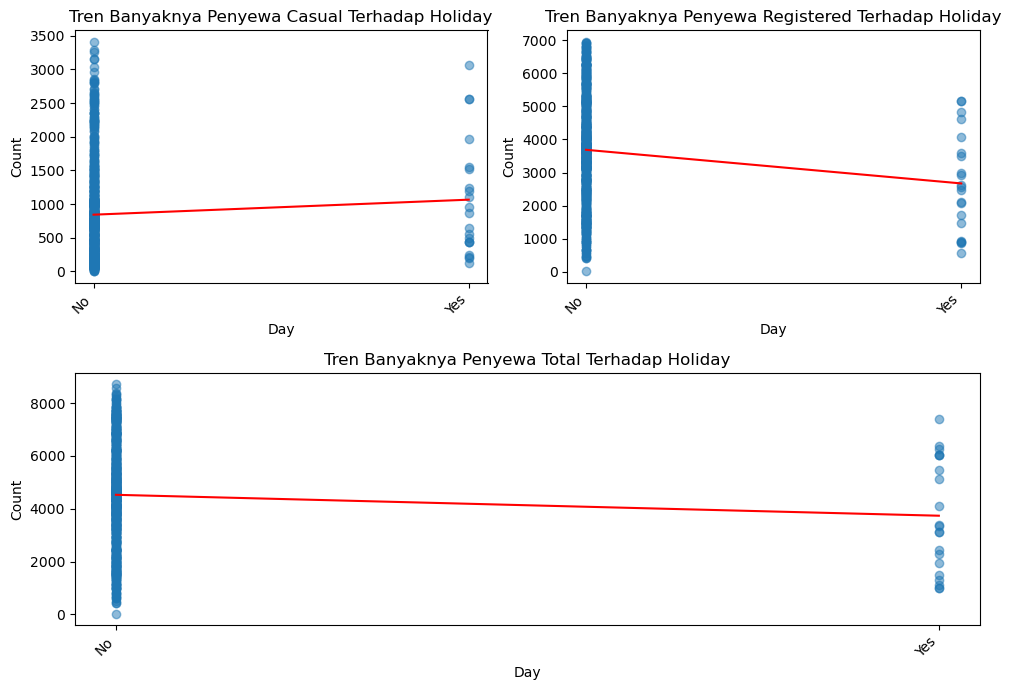

In [420]:
### Membuat data frame pengelompokan berdasarkan holiday dengan rata-rata value
df_weekday_casual = df.groupby(['Holiday'])['Casual'].mean()
df_weekday_registered = df.groupby(['Holiday'])['Registered'].mean()
df_weekday_total = df.groupby(['Holiday'])['Total_Count'].mean()

### Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(10,7))

### Mengatur dan menyiapkan grid
gs = ax[1, 0].get_gridspec()
for axes in ax[1,:]:
    axes.remove()

ax_all = fig.add_subplot(gs[1,:])

### Grafik untuk penyebaran data casual untuk holiday
## Melakukan visualisasi
ax[0,0].plot(df_weekday_casual, color='r')
ax[0,0].scatter(x = df['Holiday'], y=df['Casual'], alpha=0.5)
ax[0,0].set_xticklabels(df_weekday_casual.index,rotation=45, ha='right')

## pengaturan grafik
ax[0,0].set_title('Tren Banyaknya Penyewa Casual Terhadap Holiday')
ax[0,0].set_xlabel('Day')
ax[0,0].set_ylabel('Count')

### Grafik untuk penyebaran data registered untuk holiday
## Melakukan visualisasi
ax[0,1].plot(df_weekday_registered, color='r')
ax[0,1].scatter(x = df['Holiday'], y=df['Registered'], alpha=0.5)
ax[0,1].set_xticklabels(df_weekday_registered.index,rotation=45, ha='right')

## pengaturan grafik
ax[0,1].set_title('Tren Banyaknya Penyewa Registered Terhadap Holiday')
ax[0,1].set_xlabel('Day')
ax[0,1].set_ylabel('Count')

### Grafik untuk penyebaran data total untuk holiday
## Melakukan visualisasi
ax_all.plot(df_weekday_total, color='r')
ax_all.scatter(x = df['Holiday'], y=df['Total_Count'], alpha=0.5)
ax_all.set_xticklabels(df_weekday_total.index,rotation=45, ha='right')

## pengaturan grafik
ax_all.set_title('Tren Banyaknya Penyewa Total Terhadap Holiday')
ax_all.set_xlabel('Day')
ax_all.set_ylabel('Count')

### Mengatur layout agar simetri
fig.tight_layout()

### Menampilkan visualisasi
plt.show()

Tren penyewa casual terhadap holiday:
- Berdasarkan grafik kiri-atas, diketahui bahwa tren banyaknya penyewa casual terhadap liburan adalah jumlah penyewa casual cenderung lebih banyak ketika liburan sehingga dapat disimpulkan bahwa fungsi penyewaan sepeda bagi mereka adalah umumnya sebagai sarana rekreasi  

Tren penyewa registered tiap hari :   
- Berdasarkan grafik kanan-atas, diketahui bahwa tren banyaknya penyewa registered terhadap liburan adalah jumlah penyewa registered cenderung lebih sedikit ketika liburan sehingga dapat disimpulkan bahwa fungsi penyewaan sepeda bagi mereka adalah umumnya bukan sebagai sarana rekreasi 

Tren penyewa total tiap hari : 
- Berdasarkan grafik bawah, diketahui bahwa tren banyaknya penyewa total terhadap liburan adalah rata-rata jumlah penyewa total lebih sedikit ketika liburan sehingga dapat disimpulkan bahwa  rata-rata pengguna menyewa sepeda ketika bukan liburan. Hal ini dapat terjadi karena nilai penyewa registered jauh lebih banyak dibanding penyewa casual yang rata-rata menyewa sebagai sarana rekreasi sehingga nilai rata-rata total pengguna akan mengikuti nilai registered yang cenderung menyewa bukan sebagai sarana rekreasi. 

#### b) Data Temperatur

o Visualisasi Temperatur Selama 2011-2012

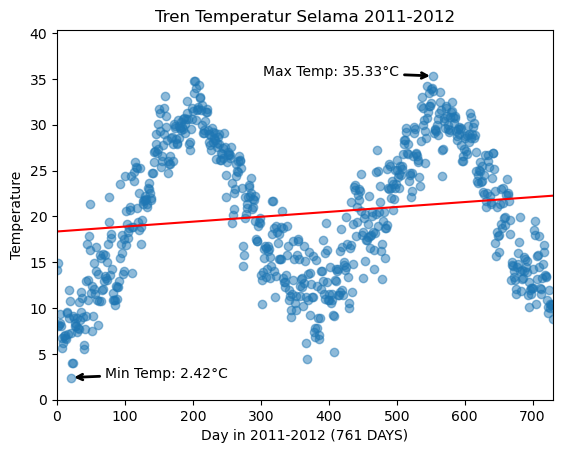

In [421]:
# Temperatur selama 2011-2012

### Mengambil nilai dari fungsi regresi liniear
x, y, y_pred = RegGraph(years='all', subject='Temperature')

### Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

### Grafik untuk penyebaran data temperatur selama 2011-2012
## pengaturan grafik
ax.set_xlim(0, x.max())
ax.set_ylim(0, y.max()+5)
ax.set_xlabel('Day in 2011-2012 (761 DAYS)')
ax.set_ylabel('Temperature')
ax.set_title('Tren Temperatur Selama 2011-2012')

## Melakukan visualisasi
ax.scatter(x = x, y = y, alpha=0.5)
ax.plot(y_pred, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='all', subject='Temperature')

ax.annotate(f'Max Temp: {max_value:.2f}°C', xy=(max_index, max_value),
                xytext=(max_index-250, max_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Temp: {min_value:.2f}°C', xy=(min_index, min_value),
                xytext=(min_index+50, min_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik temperatur tiap harinya didapatkan bahwa : 
- Temperatur mengalami kenaikan pada hari sekitar ke-200 dan ke-600 yang merupakan pertengahan tahun. Pertengahan tahun ini merupakan musim summer atau panas yang tentunya temperaturnya semakin naik.
- Tren temperatur sepanjang hari semakin meningkat. Terlihat dengan kemiringan garis regresi linear yang positif walaupun tidak signifikan sehingga dapat disimpulkan bahwa temperatur akan meningkat seiring dengan kenaikan tahun

o Visualisasi Temperatur pada tahun 2011

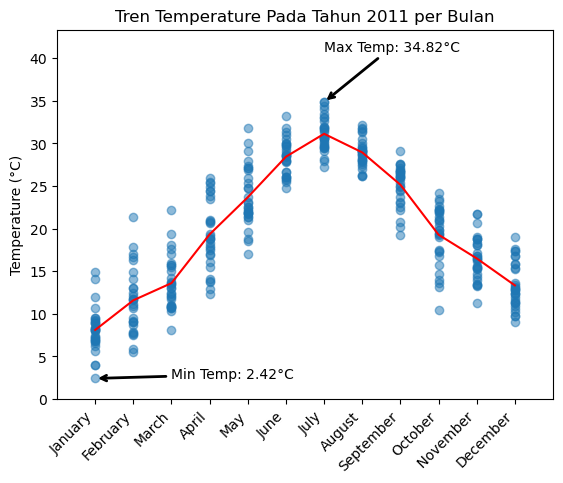

In [422]:
### DISCLAIMER :  Dipilih sampel data tahun 2011 karena ingin mengetahui perkembangan data pada setahun awal pendataan

## Mengambil Sampel data temperatur 2011 yang dikelompokkan berdasarkan bulan dengan rata-rata nilai pada bulan tersebut
df_temp_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Temperature'].mean()

### Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

## pengaturan grafik
ax.set_ylim(0, df['Temperature'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Temperature (°C)')
ax.set_xlabel('')
ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Temperature Pada Tahun 2011 per Bulan')

### Grafik untuk penyebaran data temperature selama 2011
## Melakukan visualisasi
ax.plot(df_temp_2011, color='r')
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Temperature'], alpha=0.5)

## Anotasi
max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Temperature'].min()

ax.annotate(f'Max Temp: {max_temp_value:.2f}°C', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 6),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Temp: {min_temp_value:.2f}°C', xy=(min_temp_index, min_temp_value),
            xytext=('March', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik temperatur per bulan tersebut didapatkan bahwa :
- Temperatur akan meningkat ketika menuju bulan july karena musim mulai beralih ke musim panas pada bulan tersebut dan menurun ketika menuju bulan desember yang merupakan musim dingin

#### c) Data Kelembapan 

o Visualisasi kelembapan selama 2011-2012

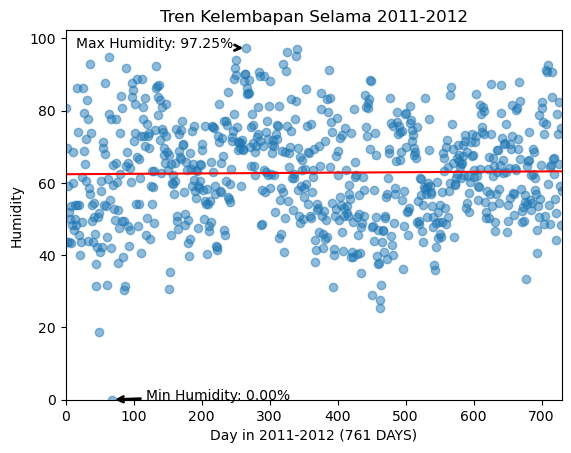

In [423]:
# Kelembapan selama 2011-2012

### Mengambil nilai dari fungsi regresi liniear
x, y, y_pred = RegGraph(years='all', subject='Humidity')

### Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

### Grafik untuk penyebaran data kelembapan selama 2011-2012
## pengaturan grafik
ax.set_xlim(0, x.max())
ax.set_ylim(0, y.max()+5)
ax.set_xlabel('Day in 2011-2012 (761 DAYS)')
ax.set_ylabel('Humidity')
ax.set_title('Tren Kelembapan Selama 2011-2012')

## melakukan visualisasi
ax.scatter(x = x, y = y, alpha=0.5)
ax.plot(y_pred, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='all', subject='Humidity')

ax.annotate(f'Max Humidity: {max_value:.2f}%', xy=(max_index, max_value),
                xytext=(max_index-250, max_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Humidity: {min_value:.2f}%', xy=(min_index, min_value),
                xytext=(min_index+50, min_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik kelembapan selama tahun 2011-2012 didapatkan bahwa : 
- Penyebaran nilai kelembapan sepanjang hari adalah random sehingga tren kelembapan sepanjang hari tidak dapat disimpulkan melalui grafik tersebut. Dengan kata lain, kelembapan kurang berkolerasi dengan hari  

__Catatan :__ perhatikan bahwa terdapat data kelembapan 0% dimana nilai tersebut tidak realistis di alam sehingga perlu ditinjau ulang

In [424]:
# Cek data ketika kelembapan 0%

imin = df['Humidity'].idxmin()
df.loc[imin:imin]

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
68,2011-03-10,Springer,2011,March,No,Thrusday,Yes,Light_SnowRain,15.952731,19.2834,0.0,17.545759,46,577,623


- Inforamasi : Data kelembapan pada tanggal tersebut __tidak valid__ sehingga dapat __diabaikan__ karena uap air akan selalu ada di udara walau sekecil apapun sehingga tidak mungkin kelembapan 0%

- Alasan : Data tersebut adalah data kosong dengan nilai 0 yang lolos pada pembersihan data karena mempunyai nilai

- Solusi : Data tersebut harus diubah menjadi nilai rata-rata humidity tanpa data tersebut. Hal ini dimaksudkan untuk menghindari kerusakan grafik pada saat visualisasi karena adanya outer.

In [425]:
# Mengubah nilai outer

# Mencari nilai rata-rata keseluruhan dengan menggunakan fungsi mean()
df_wo_outer = df.loc[df['Humidity'] != 0]
mean_value = df_wo_outer['Humidity'].mean()

# Mengubah nilai outer menjadi nilai rata-ratanya dengan indexing
df.loc[imin, 'Humidity'] = mean_value

# Menampilkan hasil
df.loc[imin:imin]

,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
68,2011-03-10,Springer,2011,March,No,Thrusday,Yes,Light_SnowRain,15.952731,19.2834,62.875419,17.545759,46,577,623


o Visualisasi kelembapan pada tahun 2011

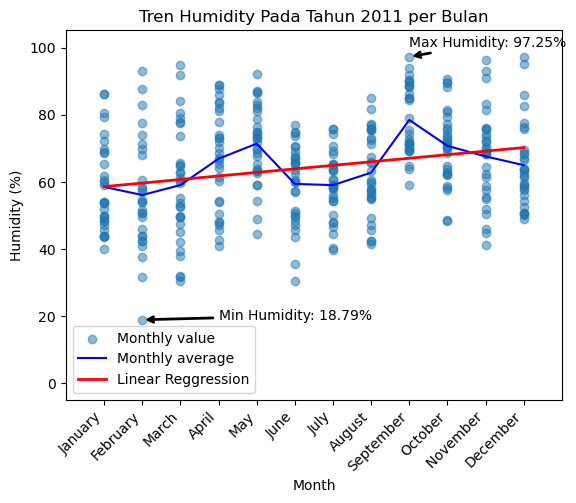

In [426]:
### DISCLAIMER :  Dipilih sampel data tahun 2011 karena ingin mengetahui perkembangan data pada setahun awal pendataan

# Sampel data kelembapan 2011

### Linear Reggression
    # membuat regresi linear dengan sumbu-x dalam bulan
df_humid_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Humidity'].mean()
df_humid_2011_raw = df_raw.loc[df['Year'] == 2011].groupby(['Month'])['Humidity'].mean()

x = df_humid_2011_raw.index.values
y = df_humid_2011_raw.values

x_cpy = pd.Series(x)
x_cpy = np.array(x).reshape(-1,1)

y_pred = LinRegression(x_cpy,y)
df_y_pred = y_pred.to_frame()
df_y_pred.index = df[df['Year'] == 2011].groupby(['Month'])['Humidity'].mean().index.values

### Grafik untuk penyebaran kelembapan tiap bulan pada tahun 2011
## Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

## pengaturan grafik
ax.set_ylim(-5, df['Humidity'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Month')
ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Humidity Pada Tahun 2011 per Bulan')

## Scatter plot untuk nilai asli tiap bulannya
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Humidity'], alpha=0.5, label='Monthly value')

## Diagram line untuk nilai rata-rata tiap bulannya
ax.plot(df_humid_2011, color='b', label='Monthly average')

## Diagram line untuk nilai regresi 
ax.plot(df_y_pred, color='r', linewidth=2, label='Linear Reggression')

## anotasi
max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Humidity'].min()

ax.annotate(f'Max Humidity: {max_temp_value:.2f}%', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Humidity: {min_temp_value:.2f}%', xy=(min_temp_index, min_temp_value),
            xytext=('April', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

## Mengatur legenda untuk menunjukkan informasi grafik
ax.legend()

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik kelembapan pada sampel data 2011 untuk tiap bulannya didapatkan bahwa : 
- Nilai rata-rata kelembapan per bulan naik pada sekitaran bulan may dan september, yaitu pada sekitar musim spring / semi dan fall / gugur. Hal ini dikarenakan pada musim-musim tersebut campuran uap air dan udara di sekitar dapat terjadi dalam kondisi normal (tidak terlalu panas/dingin) sehingga nilai kelembapannya tinggi.
- Tren kelembapan tiap bulannya cenderung mendatar. Terlihat pada kemiringan garis regresi linearnya yang positif kecil sehingga dapat disimpulkan bahwa kelembapan kurang berkolerasi dengan bulan secara keseluruhan.

#### d)  Data Kecepatan Angin

o Visualisasi kecepatan angin pada tahun 2011-2012

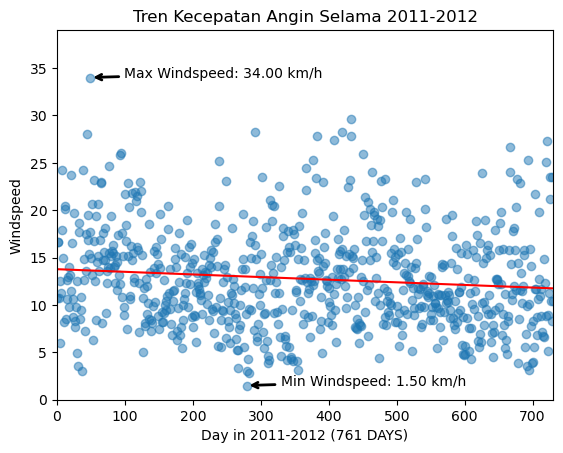

In [427]:
# Kecepatan angin selama 2011-2012

### Mengambil nilai dari fungsi regresi liniear
x, y, y_pred = RegGraph(years='all', subject='Windspeed')

### Grafik untuk penyebaran data kecepatan angin selama 2011-2012
## Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

## pengaturan grafik
ax.set_xlim(0, x.max())
ax.set_ylim(0, y.max()+5)
ax.set_xlabel('Day in 2011-2012 (761 DAYS)')
ax.set_ylabel('Windspeed')
ax.set_title('Tren Kecepatan Angin Selama 2011-2012')

## melakukan visualisasi
ax.scatter(x = x, y = y, alpha=0.5)
ax.plot(y_pred, color='r')

## Anotasi
max_value, max_index, min_value, min_index = AnnotationDay(years='all', subject='Windspeed')

ax.annotate(f'Max Windspeed: {max_value:.2f} km/h', xy=(max_index, max_value),
                xytext=(max_index+50, max_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Windspeed: {min_value:.2f} km/h', xy=(min_index, min_value),
                xytext=(min_index+50, min_value),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik kecepatan angin selama 2011-2012 didapatkan bahwa : 
- Nilai kecepatan angin tersebar secara acak tiap harinya sehingga tren kecepatan angin setiap harinya tidak dapat disimpulkan oleh grafik tersebut. Dengan kata lain, kecepatan angin kurang berkolerasi dengan hari. 
- Terlihat maximum windspeed di tempat pendataan mencapai 34 km/h yang merupakan kecepatan angin yang sangat kencang sehigga kurang dimungkinkan untuk penyewaan sepeda.

o Visualisasi kecepatan angin pada tahun 2011

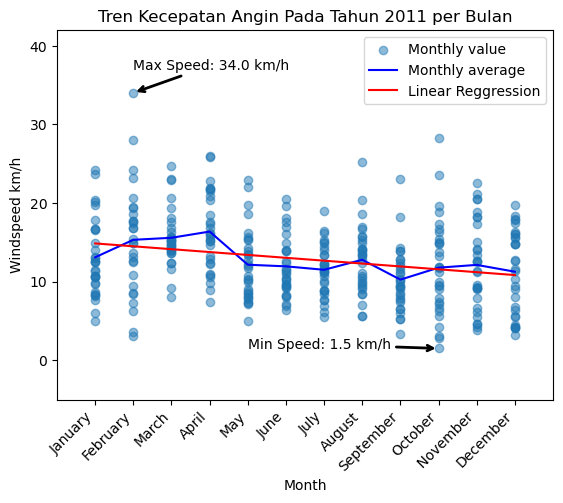

In [428]:
### DISCLAIMER :  Dipilih sampel data tahun 2011 karena ingin mengetahui perkembangan data pada setahun awal pendataan

# Sampel data kecepatan angin 2011
### Linear Reggression
    # membuat regresi linear dengan sumbu-x dalam bulan
df_wind_2011 = df.loc[df['Year'] == 2011].groupby(['Month'])['Windspeed'].mean()
df_ws_2011_raw = df_raw.loc[df['Year'] == 2011].groupby(['Month'])['Windspeed'].mean()

x = df_ws_2011_raw.index.values
y = df_ws_2011_raw.values

x_cpy = pd.Series(x)
x_cpy = np.array(x).reshape(-1,1)

y_pred = LinRegression(x_cpy,y)
df_y_pred = y_pred.to_frame()
df_y_pred.index = df[df['Year'] == 2011].groupby(['Month'])['Humidity'].mean().index.values

### Grafik untuk penyebaran data kecepatan angin tiap bulan pada tahun 2011
## Membangun bentuk dan bidang koordinat
fig, ax = plt.subplots()

## pengaturan grafik
ax.set_ylim(-5, df['Windspeed'].max() + 8)
ax.set_xlim(-1,12)
ax.set_ylabel('Windspeed km/h')
ax.set_xlabel('Month')
ax.set_xticklabels(df_temp_2011.index,rotation=45, ha='right')
ax.set_title('Tren Kecepatan Angin Pada Tahun 2011 per Bulan')

## melakukan visualisasi
ax.scatter(x = df.loc[df['Year'] == 2011]['Month'], y = df.loc[df['Year'] == 2011]['Windspeed'], alpha=0.5, label='Monthly value')
ax.plot(df_wind_2011, color='b', label='Monthly average') # grafik line tren rata-rata tiap bulan 
ax.plot(df_y_pred, color='r', label='Linear Reggression') # grafik linear regresi

## anotasi
max_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].idxmax()
max_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].max()

min_temp_index = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].idxmin()
min_temp_value = df.loc[df['Year'] == 2011].set_index('Month')['Windspeed'].min()

ax.annotate(f'Max Speed: {max_temp_value:.1f} km/h', xy=(max_temp_index, max_temp_value),
            xytext=(max_temp_index, max_temp_value + 3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

ax.annotate(f'Min Speed: {min_temp_value:.1f} km/h', xy=(min_temp_index, min_temp_value),
            xytext=('May', min_temp_value),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black', lw=2))

## Menampilkan legenda untuk menunjukkan informasi grafik
ax.legend()

### Menampilkan visualisasi
plt.show()

Berdasarkan grafik kecepatan angin tiap bulan pada 2011 didapatkan bahwa : 
- Nilai kecepatan angin berfluktuasi sehingga tren kecepatan angin setiap bulannya tidak dapat disimpulkan oleh grafik tersebut. Dengan kata lain, kecepatan angin kurang berkolerasi dengan bulan. Akan tetapi, terlihat pada garis regresi linear bahwa nilanya negatif yang artinya semakin menuju bulan desember maka semakin cepat kecepantan anginnya  

### 2.2.4 Korelasi Antar Data

#### a) Korelasi Keseluruhan

In [429]:
### Data Korelasi dalam bentuk numerikal
    # Menggunakan df_raw karena tipe datanya masih object / int / float sehingga dapat dilakukan operasi korelasi

# menyalin data frame
df_raw_corr = df_raw.copy()

# membuang kolom yang tidak diperlukan agar dapat mengurangi rendering
df_raw_corr.drop('Year', axis=1,inplace=True)

# menampilkan tabel
df_raw_corr.corr()

,Date,Season,Month,Holiday,Weekday,Workingday,Weather,Temperature,Feeling_Temperature,Humidity,Windspeed,Casual,Registered,Total_Count
Date,1.000000,0.412224,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
Season,0.412224,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
Month,0.496702,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
Holiday,0.016145,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
Weekday,-0.000016,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
Workingday,-0.004337,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
Weather,-0.021477,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
Temperature,0.150580,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
Feeling_Temperature,0.152638,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
Humidity,0.016375,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


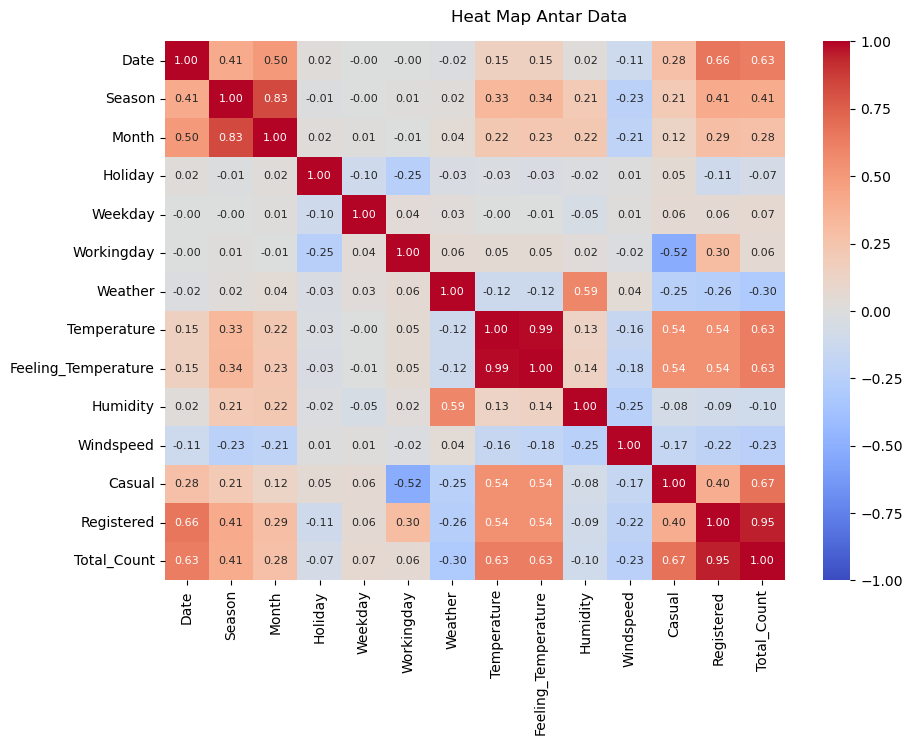

In [430]:
### Data korelasi dalam bentuk visual heatmap

# mengatur ukuran
plt.figure(figsize=(10, 7))

# melakukan visualisasi dengan seaborn heatmap dengan dibatasi 2 angka di belakang koma
sns.heatmap(df_raw_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8}, vmin=-1, vmax=1)

# pengaturan grafik
plt.suptitle('Heat Map Antar Data', y=0.925)

# menampilkan visualisasi
plt.show()

__Keterangan :__ 
-  Semakin biru maka semakin berkorelasi negatif
-  Semakin merah maka semakin berkorelasi positif
-  Semakin putih maka semakin tidak berkorelasi

#### b) Korelasi untuk data kuantitatif

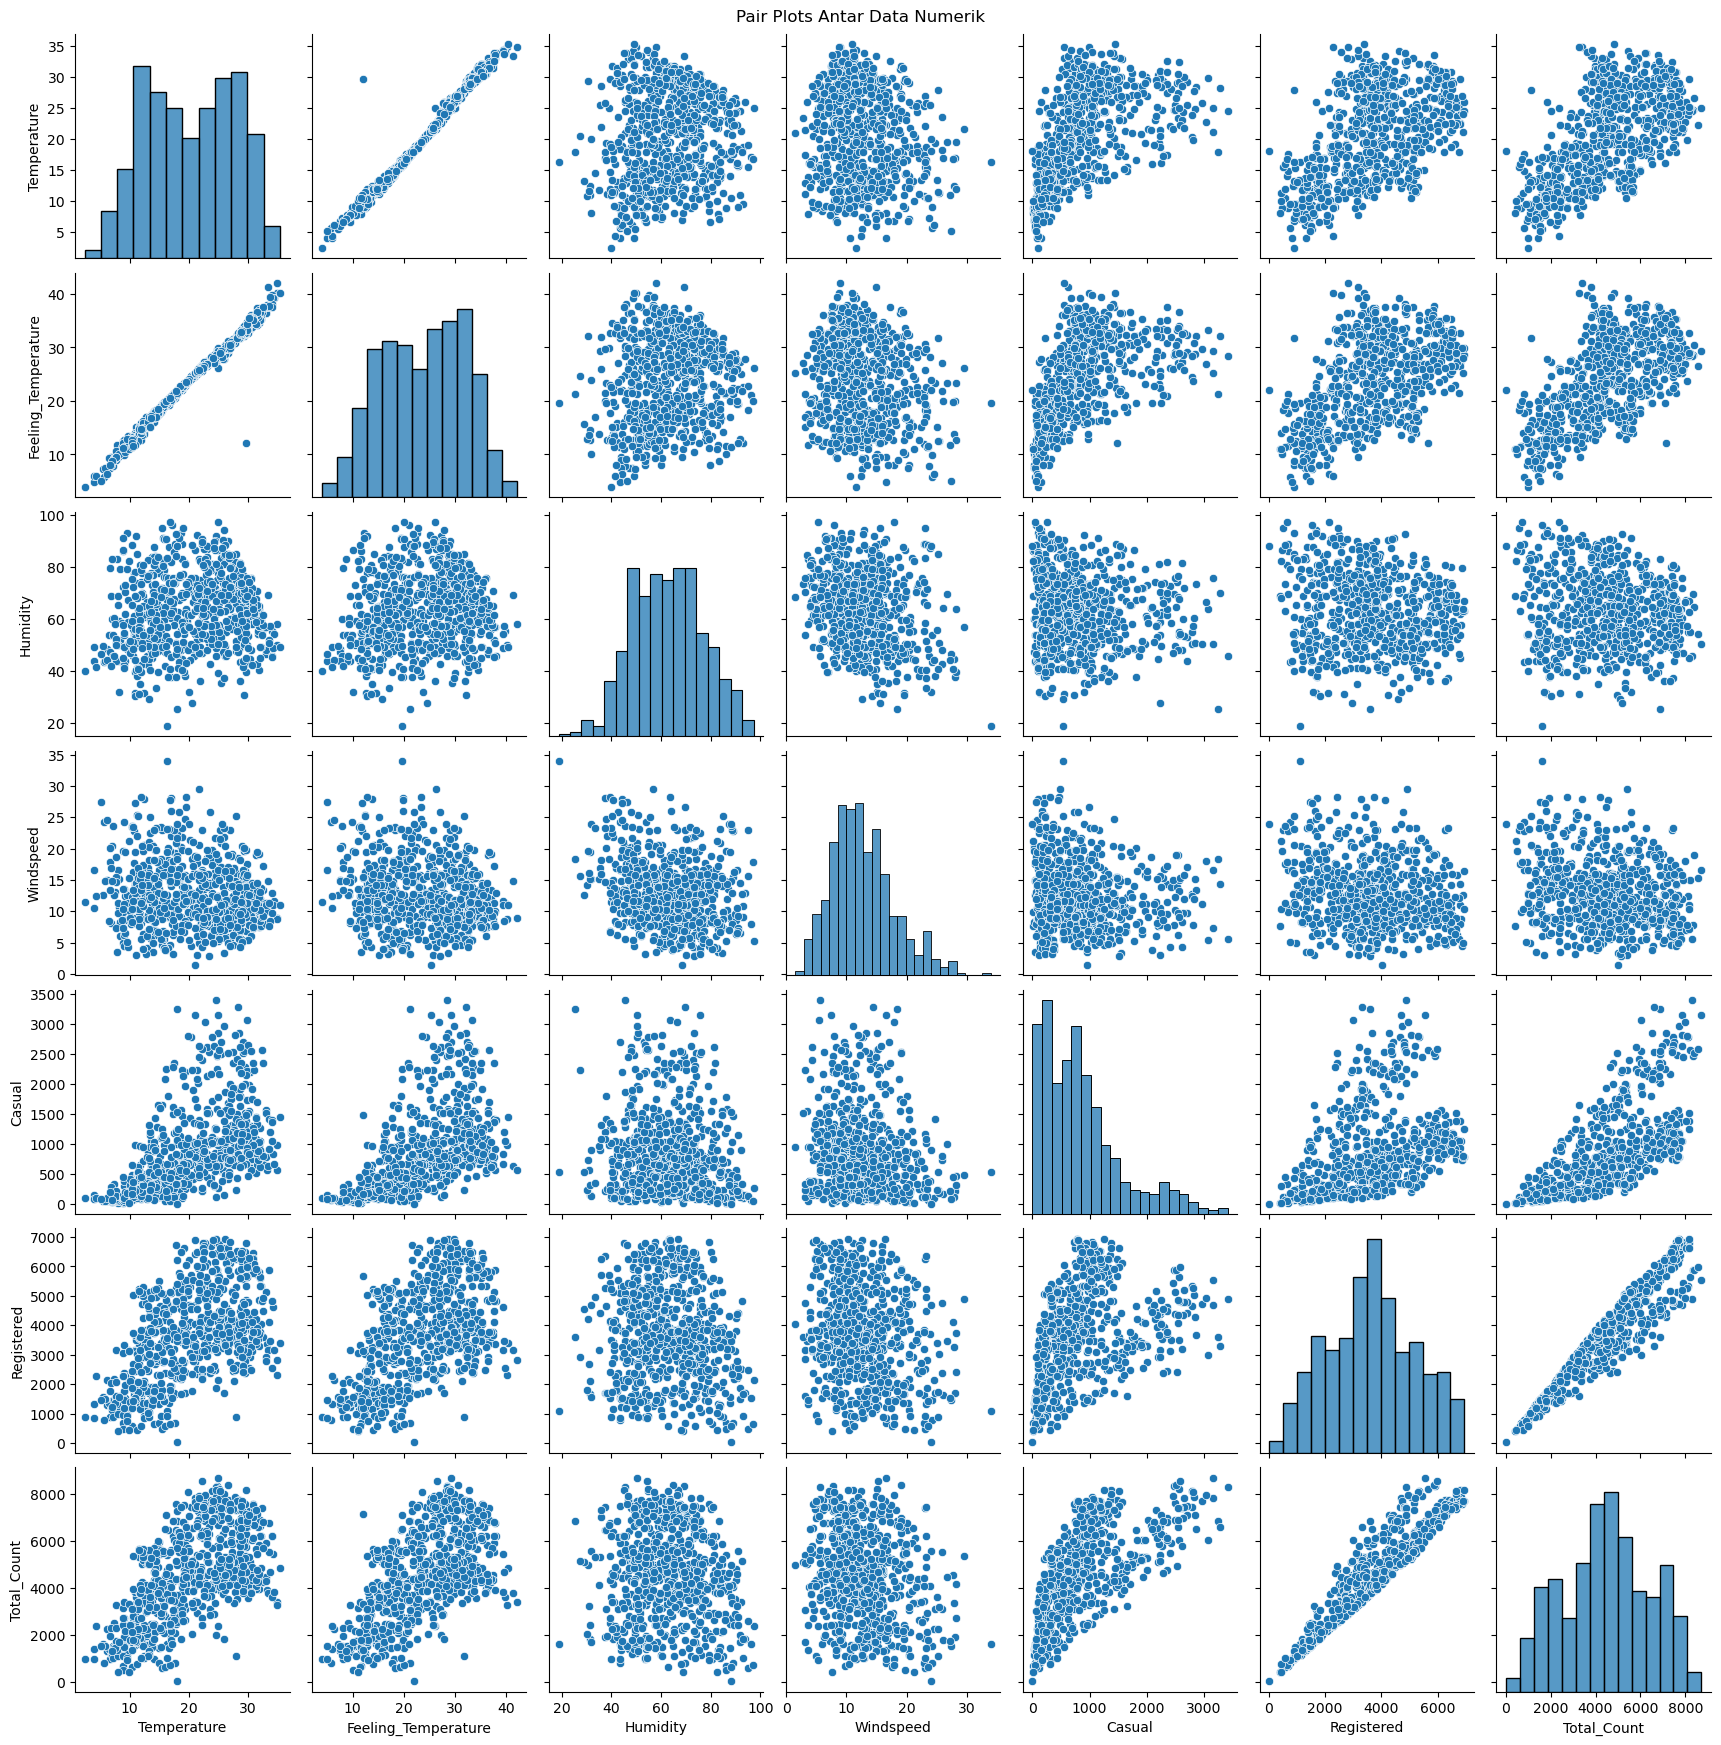

In [431]:
# melakukan visualisasi dengan seaborn pairplot untuk mengetahui grafik data antar atribut
pair_plot = sns.pairplot(df[['Temperature', 'Feeling_Temperature','Humidity', 'Windspeed','Casual','Registered','Total_Count']])

# pengaturan grafik
plt.suptitle('Pair Plots Antar Data Numerik', y=1)

# menampilkan visualisasi
plt.show()

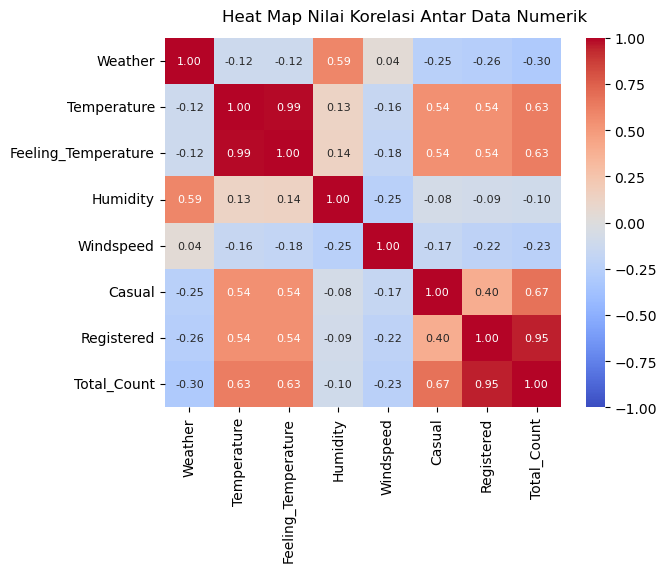

In [432]:
# melakukan visualisasi dengan seaborn heatmap dengan dibatasi 2 angka di belakang koma
sns.heatmap(df_raw_corr[['Weather','Temperature', 'Feeling_Temperature','Humidity', 'Windspeed','Casual','Registered','Total_Count']].corr(), 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            annot_kws={"size": 8}, 
            vmin=-1, 
            vmax=1)

# pengaturan grafik
plt.suptitle('Heat Map Nilai Korelasi Antar Data Numerik', y=0.94)

# menampilkan visualisasi
plt.show()

# 3. Analisis & Kesimpulan

## 3.1 Analisis terhadap data dari sumber

- Bagaimana sumber data set didapatkan dan alasan memilih data tersebut?
  - Dipilih data set bike-sharing untuk dijadikan pertimbangan dalam pengambilan kesimpulan terkait dengan isu kemacetan di kota urban dan pemanasan global akibat emisi dimana salah satu solusi yang ditawarkan oleh kelompok kami adalah dengan membudayakan penggunaan sepeda di masyarakat Indonesia. Diharapkan data bike-sharing ini dapat menjadi referensi dalam pengambilan keputusan untuk mengurangi permasalahan-permasalahan tersebut.
  - Data set bike-sharing didapatkan pada laman kaggle.com yang merupakan pusat komunitas ilmu data yang diterbitkan oleh Lakshmipathi (2018) dengan sumber tautan [https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset] . Kaggle adalah platform yang bersumber dari banyak orang untuk menarik, membina, melatih, dan menantang ilmuwan data dari seluruh dunia untuk memecahkan masalah ilmu data, pembelajaran mesin, dan analisis prediktif. 
- Bagaimana data tersebut berkaitan dengan fakultas teknik mesin dan dirgantara (FTMD) ?
  - Fakultas teknik mesin dan dirgantara (FTMD) tidak hanya membahas mengenai mekanik benda tetapi juga energi dan emisinya. Data penggunaan sepeda sangat berkaitan dengan FTMD karena terdapat aspek transportasi ramah lingkungan yang dapat mendukung kelestarian energi. 
- Bagaimana deskripsi data set awal dan apakah perlu dilakukan cleansing ?
  - Data set awal berukuran kecil, yakni 56.2 KB yang berdimensi 2 (baris dan kolom). Terdapat 731 total baris dan 16 kolom yang berisi data numerik dan satu data waktu yang bertipe objek. Tidak ditemukan baris yang duplikat sehingga dapat disimpulkan tidak ada kesalahan input pada data set awal. 
  - Diperlukan cleansing untuk memudahkan analisa data karena diketahui bahwa terdapat beberapa atribut dengan tipe kurang sesuai sehingga tidak dapat dilakukan sesuai dengan operasi atau fungsi dalam library pandas dan matplotlib. Cleansing dilakukan dengan menghapus kolom yang tidak diperlukan untuk menyederhanakan data set, mengganti nama kolom agar lebih mudah diamati dan diartikan, mengubah tipe dan kategori data agar lebih sesuai, serta mengubah nilai data agar sesuai dengan aslinya. Hasil akhir menjadi data dengan 731 baris dan 15 kolom serta data frame dibagi menjadi 2 jenis, yakni df_raw yang valuenya masih numerik agar seluruh atribut dapat dilakukan operasi statistik dan df yang valuenya kategorikal bertipe (string) dan numerik (int atau float). Hasil cleaning awal tidak ditemukan data kosong, namun setelah dilakukan visualisasi didapatkan data kelembapan dengan nilai 0 yang tidak praktis terjadi di bumi sehingga data tersebut harus diisi dengan nilai rata-ratanya untuk menghindari kesalahan operasi.
- Bagaimana karakteristik data ?
  Berdasarkan diagram pie yang sudah dibuat didapatkan bahwa atribut terbagi menjadi 5 kategori, diantaranya ;
  - Atribut Kategorikal Ordinal berjumlah = 4 : Season, month, weekday, dan weather
      - Atribut-atribut tersebut digolongkan menjadi kategorikal ordinal karena atribut tersebut memuat nilai kategori dengan urutan tertentu, misalnya season yang dimulai dari springer hingga winter sesuai dengan tanggal.
  - Atribut Kategorikal Biner berjumlah = 3 : Year, Holiday, dan Workingday
      - Atribut-atribut tersebut digolongkan menjadi kategorikal biner karena atribut tersebut memuat 2 nilai, misalnya tahun 2011 dan 2012, holiday dan not holiday, serta workingday dan not workingday
  - Atribut Kuantitatif Kontinu berjumlah = 4 : Temperature, Feeling_Temperature, Humidity, dan Windspeed
      - Atribut-atribut tersebut digolongkan menjadi kuantiatif kontinu karena atribut tersebut memuat data numerikal yang nilainya diambil di rentang kontinu, misalnya temperatur yang terdefinisi di rentang kontinu 30°C - 35.5°C (contoh)
  - Atribut Kuantitatif Diskrit berjumlah = 3 : Casual, Registered, dan Total_Count
      - Atribut-atribut tersebut digolongkan menjadi kuantiatif diskrit karena atribut tersebut memuat data numerikal yang nilainya tidak dapat diambil di rentang kontinu, misalnya banyaknya penyewa casual yang tidak kontinu atau nilainya hanya akan berada pada bilangan bulat (tidak ada jumlah penyewa casual sebanyak 100.2)
  - Atribut Time-Series berjumlah = 1 : Date
      - Atribut tersebut digolongkan menjadi Time-Series karena atribut tersebut memuat data waktu yang berkelanjutan maju, seperti tanggan 2011-01-01 < 2011-01-02 < 2011-01-03 < ...
- Bagaimana statistik data ?
  - Berdasarkan data frame statistik didapatkan masing-masing statistik atribut :
  - Count menentukan banyak data masing-masing atribut yang tersedia. Didapatkan seluruhnya bernilai 731 yang sesuai dengan banyak baris data sehingga dapat disimpulkan bahwa setiap atribut tidak terdapat data yang kosong
  - Mean menunjukkan jumlah total nilai data yang dibagi dengan banyak data dari masing-masing atribut. Nilai rerata dapat berfungsi sebagai representasi pusat persebaran data tersebut. Beberapa catatan untuk data kategorikal :
    - beberapa atribut kategorial tidak relevan dengan perhitungan rerata seperti 'Date', 'Month', 'Season', 'Year', dan 'Weekday' karena nilai datanya tetap untuk setiap tahun
    - nilai rerata untuk holiday (kategorikal biner) bernilai 0.028 yang berarti lebih banyak hari yang bukan liburan (not holiday (0)) karena nilainya mendekati 0. Sedangkan atribut 'Workingday' berlawanan dengan atribut 'Holiday' dimana nilainya 0.68 yang berarti lebih banyak hari kerja karena nilainya mendekati 1
    - nilai rerata untuk weather (kategorikal ordinal (1-4)) bernilai 1.39 yang berarti lebih banyak musim dengan kategori 1 yaitu clear
  - Persentil akan membagi data menjadi 100 bagian yang berfungsi untuk menentukan posisi data terhadap persebarannya. Persentil yang digunakan dalam statistik ini adalah 0.1, 0.25, 0.5 (median), 0.75, 0.9. Persentil 0.5 atau median dapat dijadikan sebagai metode lain untuk menentukan pusat persebaran data.
    - berdasarkan data statistik didapatkan sebagian besar nilai mediannya mirip dengan nilai reratanya kecuali pada atribut 'Casual' yang dimana mean > mediannya. Hal ini dapat menunjukkan bahwa persebarannya lebih berada di arah kiri data dan dimungkinkan terdapat outliner yang berada di kanan median.
  - Nilai maksimum dan minimum berfungsi untuk menentukan batas atas dan batas bawah atribut
  - Standard Deviation berfungsi untuk mengukur nilai data terhadap rata-ratanya. Hal ini bertujuan untuk menentukan variasibilitas data dimana semakin besar nilai SD maka semakin bervariasi datanya dan juga semakin menyebar.
    - berdasarkan data statistik didapatkan standard deviasi bernilai tinggi pada data banyak penyewa 'Casual', 'Registered', dan 'Total_Value' yang berarti data-data tersebut nilainya bervariasi dari batas bawahnya hingga batas atasnya. Namun diketahui pula berdasar poin 3 bahwa nilai persebarannya normal kecuali pada atribut 'Casual' walaupun variasinya tinggi
  - Interval berfungsi untuk menggambarkan batas-batas nilai atribut
  - Category berfungsi untuk menunjukkan kategori data yang dapat membantu analisis data
  - Count NaN dan Persen NaN menunjukkan jumlah data kosong.
    - berdasarkan  data statistik didapatkan bahwa tidak ada data kosong yang artinya data tersebut siap untuk dianalisis dan dilakukan visualisasi.

## 3.2 Peran analisa data

- Isu yang diangkat dalam topik adalah tentang transportasi di kota urban dan emisi oleh kendaraan bermotor yang solusinya adalah dengan membudayakan kegiatan bersepeda untuk menggantikan kendaraan bermotor untuk transportasi sehari-hari. Hasil analisis dari data bike-sharing di Washington DC ini dapat dijadikan gambaran tren penggunaan sepeda di masyarakat sehingga dapat digunakan sebagai rujukan karena penggunaan sepeda dapat mengurangi penggunaan kendaraan bermotor yang mengeluarkan emisi karbon yang dapat merusak lingkungan serta mengurangi kemacetan dan polusi suara oleh kendaraan bermotor. Dengan kata lain, penggunaan sepeda berkolerasi positif dengan lingkungan dan negatif dengan kemacetan dimana semakin banyak sepeda maka semakin meningkat kebersihan dan kesehatan lingkungan serta semakin menurun tingkat kemacetan.  

## 3.3 Hubungan waktu terhadap total penyewa

- Tren Masyarakat
  - Berdasarkan visualisasi data yang telah dilakukan, diketahui jika tren masyarakat sepanjang tahun semakin meningkat yang artinya masyarakat semakin gemar bersepeda. Hal ini membuktikan bahwa sistem bike-sharing ini diterima positif di masyarakat dan perlu dikembangkan lebih lanjut.
  - Diketahui juga masyarakat lebih sering menyewa sepeda pada bulan-bulan liburan musim panas. Hal ini berarti, secara umum fungsi penyewaan sepeda adalah untuk sarana rekreasi.
  - Diketahui jika penyewa casual lebih sering menyewa sepeda di hari libur dan registered di hari kerja. Hal ini dapat menjadi referensi untuk membagi fungsi dan jenis sewa sepeda agar permodalan dapat diatur lebih baik.
- Tren Temperatur
  - Berdasarkan visualisasi data yang telah dilakukan, diketahui bahwa tren temperatur tiap tahun semakin meningkat. Hal ini dikarenakan pemanasan global yang terjadi di bumi sehingga temperatur bumi meningkat lebih dari tahun sebelumnya. Hal ini semakin memperkuat bahwa harus disegerakan upaya untuk mengurangi emisi karbon untuk mengurangi pemanasan global salah satunya dengan membudayakan bersepeda di masyarakat.
  - Diketahui pula bahwa temperatur mencapai nilai tinggi ketika mendekati bulan july (musim panas) dan rendah ketika mendekati bulan desember (musim dingin). Hal ini dapat dijadikan referensi untuk strategi pemasaran sistem bike-sharing ini kedepannya.
- Tren Kelembapan
  - Berdasarkan visualisasi data yang telah dilakukan, diketahui bahwa tren kelembapan tiap tahun cenderung tidak berubah yang artinya kelembapan cenderung acak untuk tiap tahun.
  - Diketahui pula bahwa kelembapan tinggi ketika mendekati bulan Mei (musim semi) dan September (musim gugur) dimana cuaca pada kedua musim tersebut dapat dikatakan lebih ideal daripada pada musim panas atau dingin. Hal ini dapat dijadikan referensi untuk strategi pemasaran sistem bike-sharing ini kedepannya.
- Tren Kecepatan Angin
  - Berdasarkan visualisasi data yang telah dilakukan, diketahui bahwa tren kecepatan angin tiap tahun cenderung tidak berubah yang artinya kecepatan angin cenderung stabil acak tiap tahun. Hal ini dapat dijadikan referensi untuk strategi produksi sistem bike-sharing ini kedepannya.

## 3.4 Hubungan cuaca terhadap total penyewa

- Cuaca
    - Melalui visualisasi korelasi, diketahui bahwa cuaca kurang berkolerasi negatif dengan banyak penyewa. Hal ini berarti semakin cerah (nilai 1) maka semakin banyak penyewa. Hal ini membuktikan bahwa masyarakat kecenderungan menggunakan sepeda pada cuaca yang cerah.
- Temperatur dan feeling temperatur
    - Melalui visualisasi korelasi, diketahui bahwa temperatur sangat berkolerasi positif dengan feeling temperatur. Hal ini dikarenakan feeling temperatur adalah temperatur yang dirasakan masyarakat yang tentunya berkaitan dengan temperatur asli.
    - Melalui visualisasi korelasi, diketahui bahwa jumlah penyewa casual, registered, dan total berkolerasi positif dengan temperatur ataupun feeling temperatur dimana semakin tinggi temperatur maka semakin banyak penyewa sepeda. Hal ini berarti, masyarakat cenderung menyukai cuaca panas atau musim panas yang cerah untuk bersepeda. Hal ini dapat diinterpretasikan bahwa kecenderungan masyarakat yang menyewa sepeda adalah sebagai sarana rekreasi.
- Kelembapan
    - Melalui visualisasi korelasi, diketahui bahwa jumlah penyewa tidak berkolerasi dengan kelembapan. Terlihat dengan nilai korelasi yang sangat mendekati 0. Hal ini berarti jumlah penyewa tidak berhubungan dengan kelembapan lingkungan. 
- Kecepatan angin
    - Melalui visualisasi korelasi, diketahui bahwa jumlah penyewa kurang berkolerasi negatif dengan kecepatan angin. Terlihat dengan nilai korelasi yang sangat mendekati 0 dan bernilai negatif. Hal ini berarti jumlah penyewa kurang berhubungan negatif dengan kecepatan angin. Walau demikian, nilai korelasi negatif menggambarkan jika jumlah penyewa akan berbanding terbalik dengan kecepatan angin. Semakin kencang angin, maka semakin sedikit jumlah penyewa karena dorongan oleh angin yang membuat bersepeda tidak nyaman. Analisis ini dapat digunakan untuk mengatur waktu penyewaan sepeda. 

## 3.5 Strategi untuk mengurangi emisi karbon berdasar data penyewaan sepeda

- Berdasarkan analisis yang dilakukan, program bike-sharing perlu dikembangkan di Indonesia karena tren minat masyarakat yang semakin meningkat (dengan asumsi minat masyarakat di Indonesia sama dengan di Washington DC). Sistem ini akan dibagi menjadi 2 jenis pelanggan, yaitu pelanggan casual (umum) dan registered (membership). Jenis sepeda yang disewakan juga dapat divariasikan sesuai dengan fungsinya, misalnya para pelanggan casual lebih banyak menyewa sepeda untuk sarana rekreasi di hari libur seperti sabtu atau minggu sehingga sepeda yang ditawarkan dapat berupa sepeda gunung untuk hiking, sepeda keluarga, sepeda olahraga dan lain sebagainya, sedangkan untuk pelanggan registered yang umumnya menyewa sebagai sarana transportasi di hari kerja seperti senin hingga jumat sehingga sepeda yang ditawarkan dapat sepeda yang nyaman serta cepat, sepeda dengan gear ringan agar tidak lelah mengayuh, sepeda untuk anak-anak ke bersekolah, dan lain sebagainya. Pengkategorian tersebut dapat menghemat biaya produksi dan pemeliharaan sehingga sistem bike-sharing ini dapat terjaga. Selain itu, diketahui bahwa masyarakat cenderung banyak menyewa sepeda saat liburan musim panas sehingga dapat dilaksanakan event atau acara unik di sekitar bulan July mengenai maraton sepeda atau bicylce day. Event tersebut diharapkan dapat menarik minat masyarakat Indonesia untuk lebih gemar bersepeda. Faktor kelembapan dan kecepatan angin tidak terlalu berpengaruh di Indonesia karena Indonesia memiliki nilai kelembapan dan kecepatan angin yang relatif normal dan diketahui juga bahwa jumlah penyewa sepeda kurang dipengaruhi dengan nilai kelembapan ataupun kecepatan angin.

- Berdasarkan data dan analisis yang telah dilakukan, diketahui bahwa nilai temperatur berkolerasi positif dengan banyaknya penyewa. Hal ini bukan berarti semakin banyak pengguna sepeda maka akan semakin tinggi temperatur lingkungan melainkan penyewa sepeda lebih banyak menggunakan sepeda pada temperatur panas di musim panas yang cerah sebagai sarana rekreasi. Hal ini dikarenakan pendataan yang dilakukan hanya berada pada ruang lingkup yang kecil sehingga tidak dapat menjadi faktor meningkatnya temperatur global. Walau demikian, berdasarkan visualisasi temperatur sepanjang tahun diketahui bahwa temperatur global semakin meningkat seiring tahun yang salah satu faktornya adalah akibat pemanasan global dari polusi karbon sehingga perlu dikembangkan sistem bike-sharing ini sebagai salah satu solusi atas pemanasan global.

- Dengan adanya analisis terhadap data bike-sharing ini diharapkan dapat sebagai referensi untuk membudayakan bersepeda di Indonesia dengan melihat pada budaya sepeda di Washington DC yang dapat membawa dampak positif terhadap permasalahan pemanasan global kota urban.

## 3.6 Strategi untuk mengurangi kemacetan berdasar data penyewaan sepeda

- Budaya bersepeda dapat membawa dampak terhadap kemacetan kota urban yang saat ini meresahkan masyarakat karena dapat menghambat waktu dan membuat tidak nyaman. Diketahui juga bahwa tren peminat bike-sharing semakin meningkat seiring tahun sehingga ini merupakan kesempatan yang baik untuk membudayakan bersepeda di masyarakat karena selain dapat mengurangi kemacetan di lalu lintas akibat sepeda yang lebih fleksibel dan ramping, juga dapat mengurangi angka kecelakaan di jalan karena kecepatan bersepeda umumnya tidak sekencang kendaraan bermotor serta efeknya tidak akan terlalu besar.

-  Dengan adanya analisis terhadap data bike-sharing ini diharapkan dapat sebagai referensi untuk membudayakan bersepeda di Indonesia dengan melihat pada budaya sepeda di Washington DC yang dapat membawa dampak positif terhadap permasalahan kemacetan kota urban.